In [1]:
#### conda env Weather_Prediction

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error


import shap
import os
import geopandas as gpd
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', None)

In [2]:
df1=pd.read_pickle('final_dataset_103_features_90th_percentile.pkl')
full_df = df1.drop(['fips', 'year'], axis=1)
full_df

,MeanLifeExpectency,2m dew point temperature,2m temperature,Black carbon AOD at 550 nm,Dust AOD at 550 nm,Land-sea mask,Mean sea level pressure,Organic matter AOD at 550 nm,PM$_1$,PM$_{2.5}$,PM$_{10}$,Sea salt AOD at 550 nm,Sulphate AOD at 550 nm,Surface geopotential,Surface pressure,Total AOD at 469 nm,Total AOD at 550 nm,Total AOD at 670 nm,Total AOD at 865 nm,Total AOD at 1240 nm,Total column carbon monoxide,Total column ethane,Total column formaldehyde,Total column hydrogen peroxide,Total column hydroxyl radical,Total column isoprene,Total column methane,Total column nitric acid,Total column nitrogen dioxide,Total column nitrogen monoxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Total column sulphur dioxide,Total column water vapour,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Dust aerosol (0.55-0.9 µm) mixing ratio,Dust aerosol (0.9-20 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydrophilic black carbon aerosol mixing ratio,Hydrophilic organic matter aerosol mixing ratio,Hydrophobic black carbon aerosol mixing ratio,Hydrophobic organic matter aerosol mixing ratio,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Sea salt aerosol (0.03-0.5 µm) mixing ratio,Sea salt aerosol (0.5-5 µm) mixing ratio,Sea salt aerosol (5-20 µm) mixing ratio,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Total column water,Vertically integrated mass of dust aerosol (0.03-0.55 µm),Vertically integrated mass of dust aerosol (0.55-9 µm),Vertically integrated mass of dust aerosol (9-20 µm),Vertically integrated mass of hydrophilic black carbon aerosol,Vertically integrated mass of hydrophilic organic matter aerosol,Vertically integrated mass of hydrophobic black carbon aerosol,Vertically integrated mass of hydrophobic organic matter aerosol,Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Vertically integrated mass of sea salt aerosol (0.5-5 µm),Vertically integrated mass of sea salt aerosol (5-20 µm),Vertically integrated mass of sulphate aerosol,Vertically integrated mass of sulphur dioxide,Relative humidity,10m wind speed,Wet bulb temperature,FoT Carbonmonoxide above 90ᵗʰ percentile,FoT Ethane above 90ᵗʰ percentile,FoT Formaldehyde above 90ᵗʰ percentile,FoT Hydroxyl radical above 90ᵗʰ percentile,FoT Isoprene above 90ᵗʰ percentile,FoT Peroxyacetyl Nitrate above 90ᵗʰ percentile,FoT Nitric acid above 90ᵗʰ percentile,FoT Nitrogen dioxide above 90ᵗʰ percentile,FoT Nitrogen monoxide above 90ᵗʰ percentile,FoT Ozone above 90ᵗʰ percentile,FoT Hydrogen peroxide above 90ᵗʰ percentile,FoT PM$_{10}$ above 90ᵗʰ percentile,FoT PM$_{1}$ above 90ᵗʰ percentile,FoT PM$_{2.5}$ above 90ᵗʰ percentile,FoT Propane above 90ᵗʰ percentile,FoT Sulphur dioxide above 90ᵗʰ percentile,FoT Temperature above 90ᵗʰ percentile,FoT Temperature below 10ᵗʰ percentile,FoT PM$_{10}$ above EPA threshold,FoT Temperature above 90 $\mathrm{^o F}$,FoT Temperature below 0 $\mathrm{^o C}$,FoT PM$_{2.5}$ above EPA threshold
0,74.628765329999993,285.629269414872169,290.863352214209158,0.00757124815486,0.010371692890225,0.986464531564209,101746.46078524258337,0.097522246908886,0.000000015615338,0.000000019601377,0.000000027192044,0.00860619294015,0.112170314070482,1368.670051439976305,100086.817007783130975,0.288798537560071,0.236241944078782,0.180380990078313,0.123618863685572,0.069164993038643,0.000984550381998,0.000003862356441,0.000003599970514,0.000008836077454,0.000000004853489,0.000001984446001,0.009753834615672,0.000007246513254,0.000004130302193,0.000000542480041,0.006426156201957,0.000008713431766,0.00000074020297,0.000004737026637,25.902900677695214,0.000000230284119,0.000000000654884,0.000000001134462,0.000000000403961,0.000000000705993,0.000000003513651,0.000000000741261,0.00000000022451,0.000000010096395,0.000000000254529,0.000000005847693,0

In [3]:
columns_to_remove = ['Land-sea mask', 'Total AOD at 550 nm','Total AOD at 670 nm','Total AOD at 865 nm',
                      'Dust aerosol (0.55-0.9 \u00B5m) mixing ratio','Dust aerosol (0.9-20 \u00B5m) mixing ratio',
                    'Hydrophilic black carbon aerosol mixing ratio','Hydrophilic organic matter aerosol mixing ratio',
                     'Hydrophobic black carbon aerosol mixing ratio','Hydrophobic organic matter aerosol mixing ratio',
                    'Sea salt aerosol (0.03-0.5 \u00B5m) mixing ratio','Sea salt aerosol (0.5-5 \u00B5m) mixing ratio',
                     'Sea salt aerosol (5-20 \u00B5m) mixing ratio',
                     'Vertically integrated mass of dust aerosol (0.55-9 \u00B5m)',
                      'Vertically integrated mass of dust aerosol (9-20 \u00B5m)',
                     'Vertically integrated mass of hydrophilic black carbon aerosol',
                    'Vertically integrated mass of hydrophilic black carbon aerosol',
                     'Vertically integrated mass of hydrophilic organic matter aerosol',
                     'Vertically integrated mass of hydrophobic black carbon aerosol',
                     'Vertically integrated mass of hydrophobic organic matter aerosol',
                    'Vertically integrated mass of sea salt aerosol (0.5-5 \u00B5m)',
                     'Vertically integrated mass of sea salt aerosol (5-20 \u00B5m)']

In [4]:
full_df = full_df.drop(columns=columns_to_remove)
full_df

,MeanLifeExpectency,2m dew point temperature,2m temperature,Black carbon AOD at 550 nm,Dust AOD at 550 nm,Mean sea level pressure,Organic matter AOD at 550 nm,PM$_1$,PM$_{2.5}$,PM$_{10}$,Sea salt AOD at 550 nm,Sulphate AOD at 550 nm,Surface geopotential,Surface pressure,Total AOD at 469 nm,Total AOD at 1240 nm,Total column carbon monoxide,Total column ethane,Total column formaldehyde,Total column hydrogen peroxide,Total column hydroxyl radical,Total column isoprene,Total column methane,Total column nitric acid,Total column nitrogen dioxide,Total column nitrogen monoxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Total column sulphur dioxide,Total column water vapour,Carbon monoxide,Dust aerosol (0.03-0.55 µm) mixing ratio,Ethane,Formaldehyde,Hydrogen peroxide,Hydroxyl radical,Isoprene,Nitric acid,Nitrogen dioxide,Nitrogen monoxide,Ozone,Peroxyacetyl nitrate,Propane,Specific humidity,Sulphate aerosol mixing ratio,Sulphur dioxide,Temperature,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Total column water,Vertically integrated mass of dust aerosol (0.03-0.55 µm),Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Vertically integrated mass of sulphate aerosol,Vertically integrated mass of sulphur dioxide,Relative humidity,10m wind speed,Wet bulb temperature,FoT Carbonmonoxide above 90ᵗʰ percentile,FoT Ethane above 90ᵗʰ percentile,FoT Formaldehyde above 90ᵗʰ percentile,FoT Hydroxyl radical above 90ᵗʰ percentile,FoT Isoprene above 90ᵗʰ percentile,FoT Peroxyacetyl Nitrate above 90ᵗʰ percentile,FoT Nitric acid above 90ᵗʰ percentile,FoT Nitrogen dioxide above 90ᵗʰ percentile,FoT Nitrogen monoxide above 90ᵗʰ percentile,FoT Ozone above 90ᵗʰ percentile,FoT Hydrogen peroxide above 90ᵗʰ percentile,FoT PM$_{10}$ above 90ᵗʰ percentile,FoT PM$_{1}$ above 90ᵗʰ percentile,FoT PM$_{2.5}$ above 90ᵗʰ percentile,FoT Propane above 90ᵗʰ percentile,FoT Sulphur dioxide above 90ᵗʰ percentile,FoT Temperature above 90ᵗʰ percentile,FoT Temperature below 10ᵗʰ percentile,FoT PM$_{10}$ above EPA threshold,FoT Temperature above 90 $\mathrm{^o F}$,FoT Temperature below 0 $\mathrm{^o C}$,FoT PM$_{2.5}$ above EPA threshold
0,74.628765329999993,285.629269414872169,290.863352214209158,0.00757124815486,0.010371692890225,101746.46078524258337,0.097522246908886,0.000000015615338,0.000000019601377,0.000000027192044,0.00860619294015,0.112170314070482,1368.670051439976305,100086.817007783130975,0.288798537560071,0.069164993038643,0.000984550381998,0.000003862356441,0.000003599970514,0.000008836077454,0.000000004853489,0.000001984446001,0.009753834615672,0.000007246513254,0.000004130302193,0.000000542480041,0.006426156201957,0.000008713431766,0.00000074020297,0.000004737026637,25.902900677695214,0.000000230284119,0.000000000654884,0.000000000705993,0.000000003513651,0.000000000741261,0.000000000000028,0.000000014604292,0.000000001474772,0.000000010235872,0.000000000867748,0.00000005814554,0.000000003056157,0.000000000328437,0.010010040534155,0.00000000404404,0.000000009229008,17.605204629052423,3.904460199286052,2.618741604547198,0.879750469058084,0.000000093784908,26.035876613510123,0.000001993471045,0.000000220848889,0.000011681476149,0.00000288632888,71.152047054515833,0.209342152896552,14.185547266162992,19.623287671232877,16.404109589041095,46.643835616438359,22.979452054794521,33.082191780821915,42.328767123287669,21.472602739726028,13.493150684931507,3.869863013698630,45.376712328767120,28.904109589041095,29.383561643835616,22.157534246575342,30.753424657534246,7.705479452054795,16.780821917808218,52.363013698630134,13.116438356164384,0.034246575342466,0.000000000000000,1.643835616438356,78.219178082191775
1,76.661419230000007,289.075082204243699,292.904504754344714,0.007386436848696,0.012786048677104,101714.38567138351209,0.080536809563287,0.000000010517524,0.000000014405518,0.000000020184934,0.013378239581773,0.098994377620422,170.454787516937728,101507.029992429539561,0.258548

In [5]:
## Lets create a Train-Test set

features=full_df.drop('MeanLifeExpectency',axis=1)
target=full_df['MeanLifeExpectency'].copy()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20) 

In [6]:
## initial results

forest_reg=RandomForestRegressor(n_jobs=-1)
forest_reg.fit(X_train, y_train)

train_prediction=forest_reg.predict(X_train)

mse_train=mean_squared_error(y_train, train_prediction)
rmse_train=np.sqrt(mse_train)
rmse_train=int(rmse_train*100)/100 ## display only two digits without rounding

print('The train RMSE :::', '%.2f' % rmse_train)

The train RMSE ::: 0.46


In [7]:
## lets do a cross-validation to identify overfitting and test if there is variation in the output result,
## based on variability of the input data

scores=cross_val_score(forest_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=2, n_jobs=6) ## can select other scoring as well
                                                                          ## n_jobs uses the number of cores
rmse_scores=np.sqrt(-scores)
sd_rmse=rmse_scores.std()
avg_score=rmse_scores.mean()

In [8]:
print(f'RMSE scores for each fold: {rmse_scores}')
print(f'Mean RMSE score: {avg_score}')
print(f'Standard deviation of RMSE scores: {sd_rmse}')

RMSE scores for each fold: [1.3638472  1.35661068]
Mean RMSE score: 1.3602289372925722
Standard deviation of RMSE scores: 0.00361826038254931


In [9]:
%%time
## lets optimize the hyperparameters
forest_reg=RandomForestRegressor(n_jobs=-1, oob_score=True) ## also include oob score. this can be removed if not necessary

hyper_parameters=[{'n_estimators':[20, 30],'max_features': [10], 'max_depth':[100],
                                                              'min_samples_split':[ 10]}]
grid_search=GridSearchCV( forest_reg,hyper_parameters, cv=2, scoring="neg_mean_squared_error",return_train_score=True, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\Users\Shisir\.conda\envs\Weather_Prediction\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Shisir\.conda\envs\Weather_Prediction\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


CPU times: total: 1min 20s
Wall time: 7.86 s


,estimator,RandomForestR...ob_score=True)
,param_grid,"[{'max_depth': [100], 'max_features': [10], 'min_samples_split': [10], 'n_estimators': [20, 30]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,2
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [10]:
grid_search.best_estimator_

,n_estimators,30
,criterion,'squared_error'
,max_depth,100
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [11]:
## lets now select the model. This will be used later
final_model=grid_search.best_estimator_

In [12]:
## fit the model and find the error in the traning set

final_model.fit(X_train,y_train)

train_prediction=final_model.predict(X_train)

mse_train=mean_squared_error(y_train, train_prediction)
rmse_train=np.sqrt(mse_train)
rmse_train=int(rmse_train*100)/100 ## display only two digits without rounding

print('The train RMSE :::', '%.2f' % rmse_train)

The train RMSE ::: 0.75


In [13]:
oob_score=final_model.oob_score_
print(f'OOB score is: {oob_score:.2}') ## oob_score_ is calucalated as R$^2$ between true and estimated 

OOB score is: 0.67


In [14]:
## The test prediction

test_prediction=final_model.predict(X_test)

mse_test=mean_squared_error(y_test,test_prediction)
rmse_test=np.sqrt(mse_test)
rmse_test=int(rmse_test*100)/100 

print('The test RMSE :::', '%.2f' % rmse_test)

The test RMSE ::: 1.40


In [15]:
## the train r square

train_r_sq=(pearsonr(y_train,train_prediction)[0])**2
corr_train=int(train_r_sq*100)/100 ## display only two digits without rounding

print('The train r_sq :::', '%.2f' % corr_train)

The train r_sq ::: 0.91


In [16]:
## The test r square

test_r_sq=(pearsonr(y_test,test_prediction)[0])**2
corr_test=int(test_r_sq*100)/100 ## display only two digits without rounding

print('The test r_sq :::', '%.2f' % corr_test)

The test r_sq ::: 0.68


In [17]:
## calculate the adjusted r square

## in training set

n_train=X_train.shape[0] ## number of samples in training set
n_test=X_test.shape[0]  ## number of samples in test set
p=X_train.shape[1] ## number of features, which is the same in train and test set

train_adjusted_r2=1-(1-corr_train)*((n_train-1)/(n_train-p-1))
train_adjusted_r2=int(train_adjusted_r2*100)/100 ## display only two digits without rounding

test_adjusted_r2=1-(1-corr_test)*((n_test-1)/(n_test-p-1))
test_adjusted_r2=int(test_adjusted_r2*100)/100 ## display only two digits without rounding

print('The adjusted train r_sq :::', '%.2f' % train_adjusted_r2)
print('The adjusted test r_sq :::', '%.2f' % test_adjusted_r2)

The adjusted train r_sq ::: 0.90
The adjusted test r_sq ::: 0.67


In [18]:
## steps to convert train and test to pandas dataframe. This step is necessary to plot in seaborn

y_train_np=y_train.to_numpy() ## convert dtype to numpy to plot from seaborn
y_test_np=y_test.to_numpy() 

df1=pd.DataFrame(y_train_np, columns=['Actual'])
df2=pd.DataFrame(train_prediction, columns=['Estimated'])
df3=pd.concat([df1, df2],axis=1)  ## concatenate the columns
df3['Label']='Train'

df4=pd.DataFrame(y_test_np, columns=['Actual'])
df5=pd.DataFrame(test_prediction, columns=['Estimated'])
df6=pd.concat([df4, df5],axis=1)
df6['Label']='Test'

sns_df=pd.concat([df3,df6])

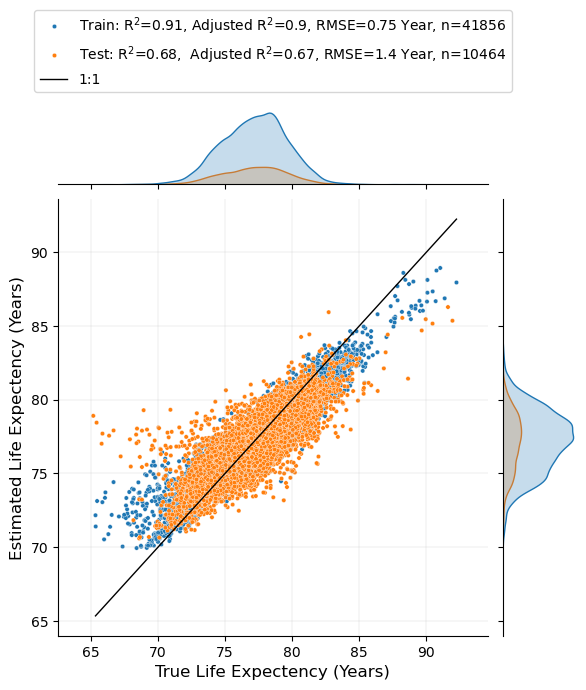

In [19]:
## scatter plot in seaborn

g=sns.jointplot(data=sns_df, x='Actual', y='Estimated', kind="scatter", hue='Label',s=10)
plt.grid(axis='both',linewidth=0.15)

p1 = max(max(train_prediction), max(y_train))
p2 = min(min(train_prediction), min(y_train))

g.ax_joint.plot([p1, p2], [p1, p2], color='k',linewidth=1, label='1:1')

# Customize the legend
handles, labels = g.ax_joint.get_legend_handles_labels()  



g.ax_joint.legend(handles=handles,  
    labels=[ f'Train: R$^2$={corr_train}, Adjusted R$^2$={train_adjusted_r2}, RMSE={rmse_train} Year, n={len(X_train)}', 
        f'Test: R$^2$={corr_test},  Adjusted R$^2$={test_adjusted_r2}, RMSE={rmse_test} Year, n={len(X_test)}','1:1'],
                        title=None)

sns.move_legend(g.ax_joint, "upper center", bbox_to_anchor=(0.5, 1.45))

g.set_axis_labels(r'True Life Expectency (Years)', r'Estimated Life Expectency (Years)',fontsize=12)

plt.show()

In [20]:
df3

,Actual,Estimated,Label
0,77.557371250000003,77.974762386315646,Train
1,78.570767610000004,78.926402503604081,Train
2,81.283117649999994,81.344138501177483,Train
3,76.932800150000006,78.514423063831273,Train
4,73.023469539999994,73.792701260614706,Train
...,...,...,...
41851,77.907687069999994,78.275161971996852,Train
41852,77.089816830000004,76.605105691734167,Train
41853,73.579368889999998,74.026844589043037,Train
41854,77.360220790000000,77.594183786988367,Train


In [21]:
df6

,Actual,Estimated,Label
0,79.468005169999998,77.733339483601199,Test
1,78.248770399999998,76.771929968900380,Test
2,80.074139049999999,79.223483625934108,Test
3,73.144317729999997,74.280087924255284,Test
4,81.283664450000003,78.550896180436155,Test
...,...,...,...
10459,77.606667659999999,77.571337934679860,Test
10460,76.207880590000002,76.856554427898345,Test
10461,78.664252480000002,78.186520925741192,Test
10462,74.386348429999998,75.860846259703990,Test


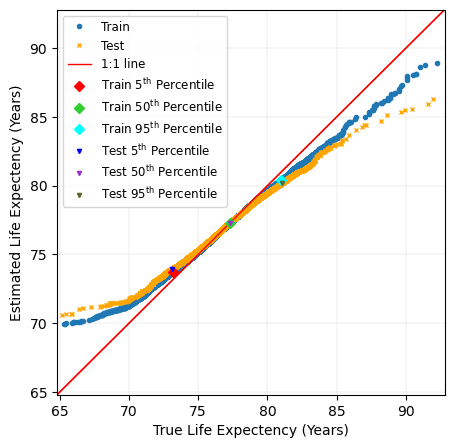

In [22]:
## Lets plot the quantile-quantile plot

fig, ax = plt.subplots(figsize=(5,5))

pp_x = sm.ProbPlot(y_train, fit=False)
pp_y = sm.ProbPlot(train_prediction, fit=False)


qq = pp_y.qqplot(marker='o',markersize=3,other=pp_x,ax=ax, label='Train') ## qq plot for train data
sm.qqline(ax=ax, line='45', fmt='r',linewidth=1)

pp_xx = sm.ProbPlot(y_test, fit=False)
pp_yy = sm.ProbPlot(test_prediction, fit=False)

## overlay qq plot for test data
qqq = pp_yy.qqplot(xlabel='True Life Expectency (Years)',ylabel='Estimated Life Expectency (Years)',
                            marker='x',markersize=3,other=pp_xx,ax=ax,markeredgecolor = 'orange',
                                      markerfacecolor = 'orange', label='Test')

sm.qqline(qq.axes[0], line='45', fmt='r',linewidth=1, label='1:1 line')


## find the percentiles

train_05_actual = df3['Actual'].quantile(0.05)
train_50_actual = df3['Actual'].quantile(0.50)
train_95_actual = df3['Actual'].quantile(0.95)

train_05_estimated = df3['Estimated'].quantile(0.05)
train_50_estimated = df3['Estimated'].quantile(0.50)
train_95_estimated = df3['Estimated'].quantile(0.95)

test_05_actual = df6['Actual'].quantile(0.05)
test_50_actual = df6['Actual'].quantile(0.50)
test_95_actual = df6['Actual'].quantile(0.95)

test_05_estimated = df6['Estimated'].quantile(0.05)
test_50_estimated = df6['Estimated'].quantile(0.50)
test_95_estimated = df6['Estimated'].quantile(0.95)

## plot the percentiles

plt.plot(train_05_actual,train_05_estimated, marker="D",markersize=5,color="red",linestyle ='None',
         label="Train $\\mathrm{5^{th}}$ Percentile")
plt.plot(train_50_actual,train_50_estimated, marker="D",markersize=5,color="limegreen",linestyle ='None',
         label="Train $\\mathrm{50^{th}}$ Percentile")
plt.plot(train_95_actual,train_95_estimated, marker="D",markersize=5,color="Cyan",linestyle ='None',
         label="Train $\\mathrm{95^{th}}$ Percentile")

plt.plot(test_05_actual,test_05_estimated, marker="v",markersize=3,color="blue",linestyle ='None',
         label="Test $\\mathrm{5^{th}}$ Percentile")
plt.plot(test_50_actual,test_50_estimated, marker="v",markersize=3,color="darkorchid",linestyle ='None',
         label="Test $\\mathrm{50^{th}}$ Percentile")
plt.plot(test_95_actual,test_95_estimated, marker="v",markersize=3,color="darkolivegreen",linestyle ='None',
         label="Test $\\mathrm{95^{th}}$ Percentile")


plt.grid(axis='both',linewidth=0.15)
plt.legend(fontsize=8.5)
plt.show()

In [23]:
train_permutation = permutation_importance(final_model, X_train, y_train, 
                                            n_jobs = 6, ## number of cores to run
                                             n_repeats = 2) ## number of times to shuffle, default is 5

In [24]:
mean_val=train_permutation['importances_mean'] ## mean feature importance
std_value=train_permutation['importances_std'] ## standard deviation after shuffling 9 times
feature_names=X_train.columns  ## get features names

mean_importance=sorted(zip(mean_val, feature_names), reverse=True) 
std_importance=sorted(zip(std_value, feature_names), reverse=True)

In [25]:
mean_imp = pd.DataFrame(mean_val, columns=['Mean Weight'])
std_imp = pd.DataFrame(std_value, columns=['Standard Deviation'])
feature_names=list(features.columns.values) ## get list of features as list
feature_df = pd.DataFrame(feature_names, columns=['Feature'])
train_FI = pd.concat([feature_df,mean_imp, std_imp ], axis=1) 
# Sort in descending order
train_FI = train_FI.sort_values(['Mean Weight'], ascending=[False])

In [26]:
train_FI

,Feature,Mean Weight,Standard Deviation
61,FoT Formaldehyde above 90ᵗʰ percentile,0.085454308429430,0.000580784185594
73,FoT Propane above 90ᵗʰ percentile,0.058298871503596,0.000152962037589
48,"Leaf area index, low vegetation",0.055356693723860,0.000163133299004
0,2m dew point temperature,0.053599490818048,0.000203071758778
47,"Leaf area index, high vegetation",0.052599594119835,0.000271328634358
...,...,...,...
32,Ethane,0.005198567843343,0.000064760277487
8,PM$_{10}$,0.004933779762231,0.000096290955069
7,PM$_{2.5}$,0.004798215621497,0.000091978950006
2,Black carbon AOD at 550 nm,0.004484204482600,0.000160924809766


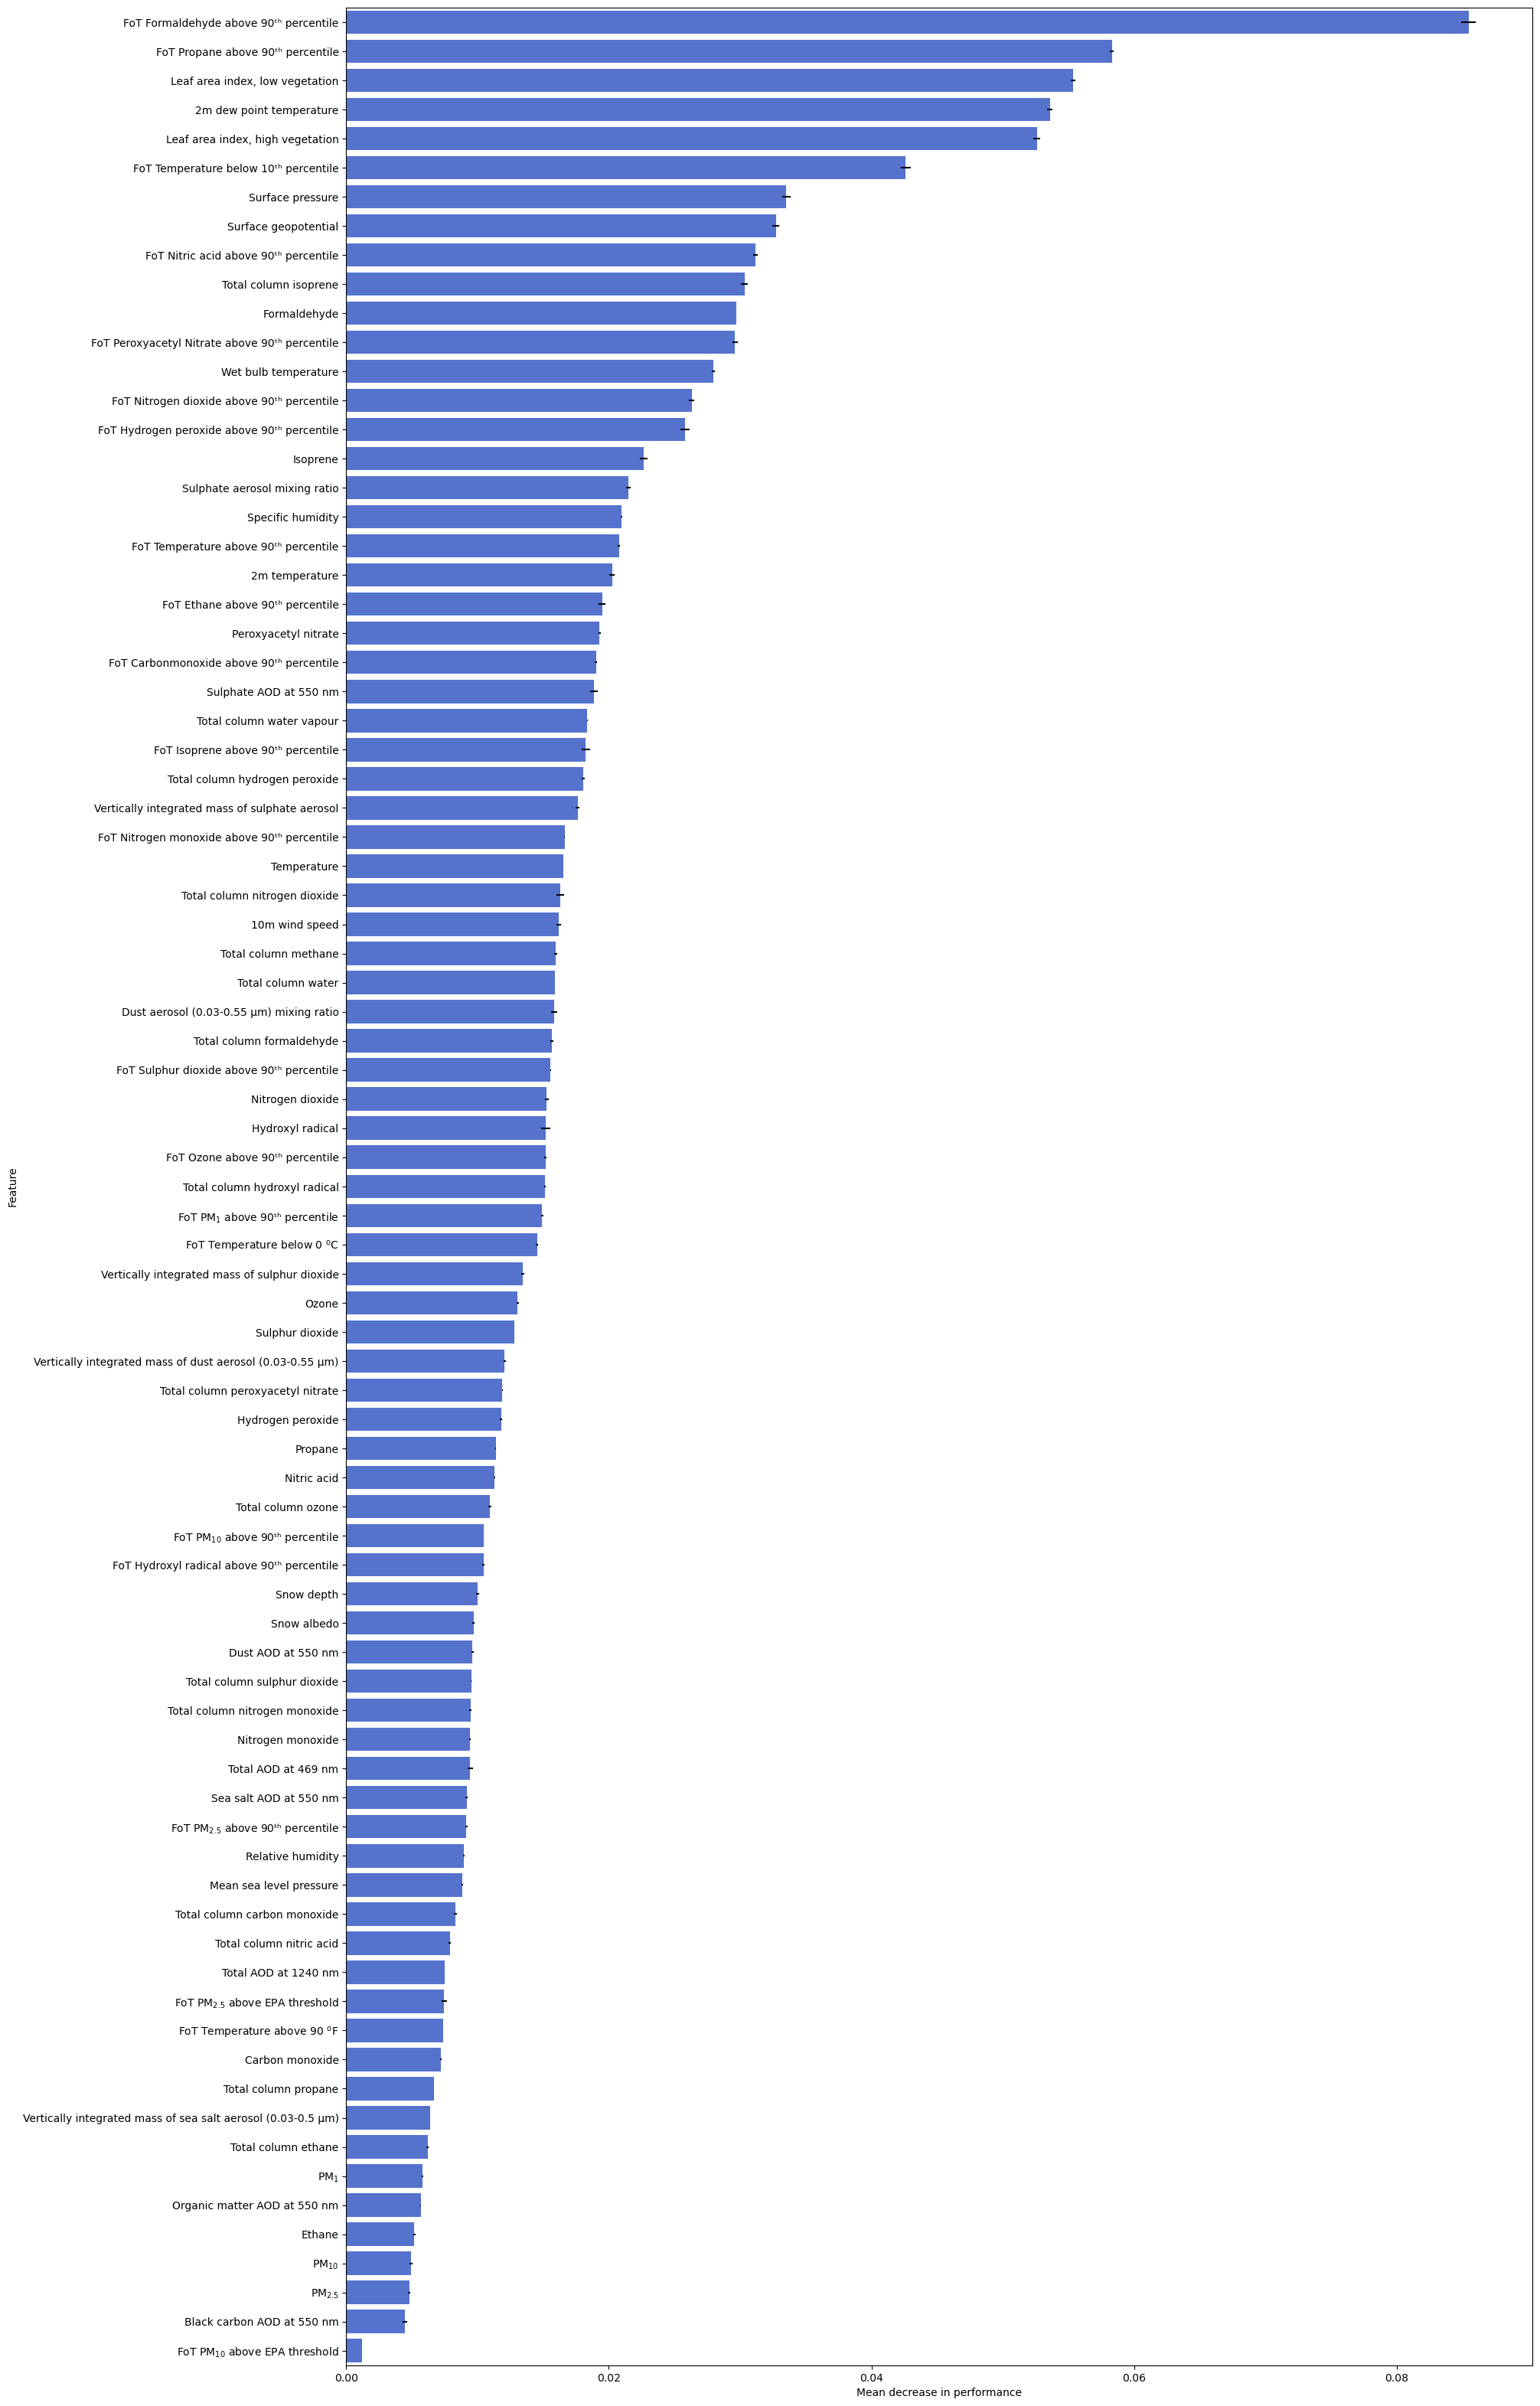

In [27]:
# Plot with custom error bars
fig, ax = plt.subplots(figsize=(20, 40))

sns.barplot(
    data=train_FI,
    x = "Mean Weight",
    y = "Feature",
    xerr = train_FI["Standard Deviation"],   # explicitly pass the std column
    capsize = 0.2,      # add caps to error bars
    color = "royalblue",
)


plt.xlabel("Mean decrease in performance")
plt.show()

In [28]:
train_FI_15 = train_FI.head(15) ## get only the top 15 features

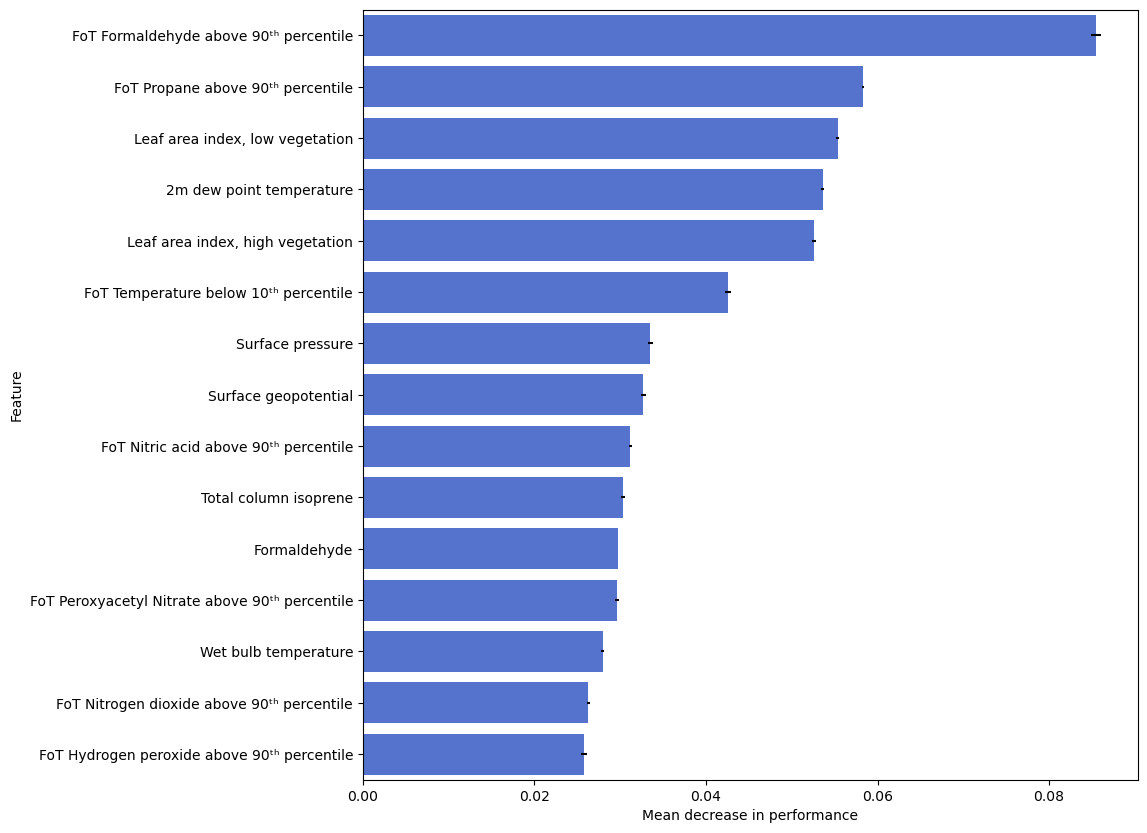

In [29]:
# Plot with custom error bars
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(
    data = train_FI_15,
    x = "Mean Weight",
    y = "Feature",
    xerr = train_FI_15["Standard Deviation"],   # explicitly pass the std column
    capsize = 0.2,      # add caps to error bars
    color = "royalblue",
)

plt.xlabel("Mean decrease in performance")
plt.show()

# Get rid of multicollinearity

In [30]:
X=full_df.drop('MeanLifeExpectency',axis=1)

Text(354, 0.41, 'Cluster of \ntemperature \nvariables')

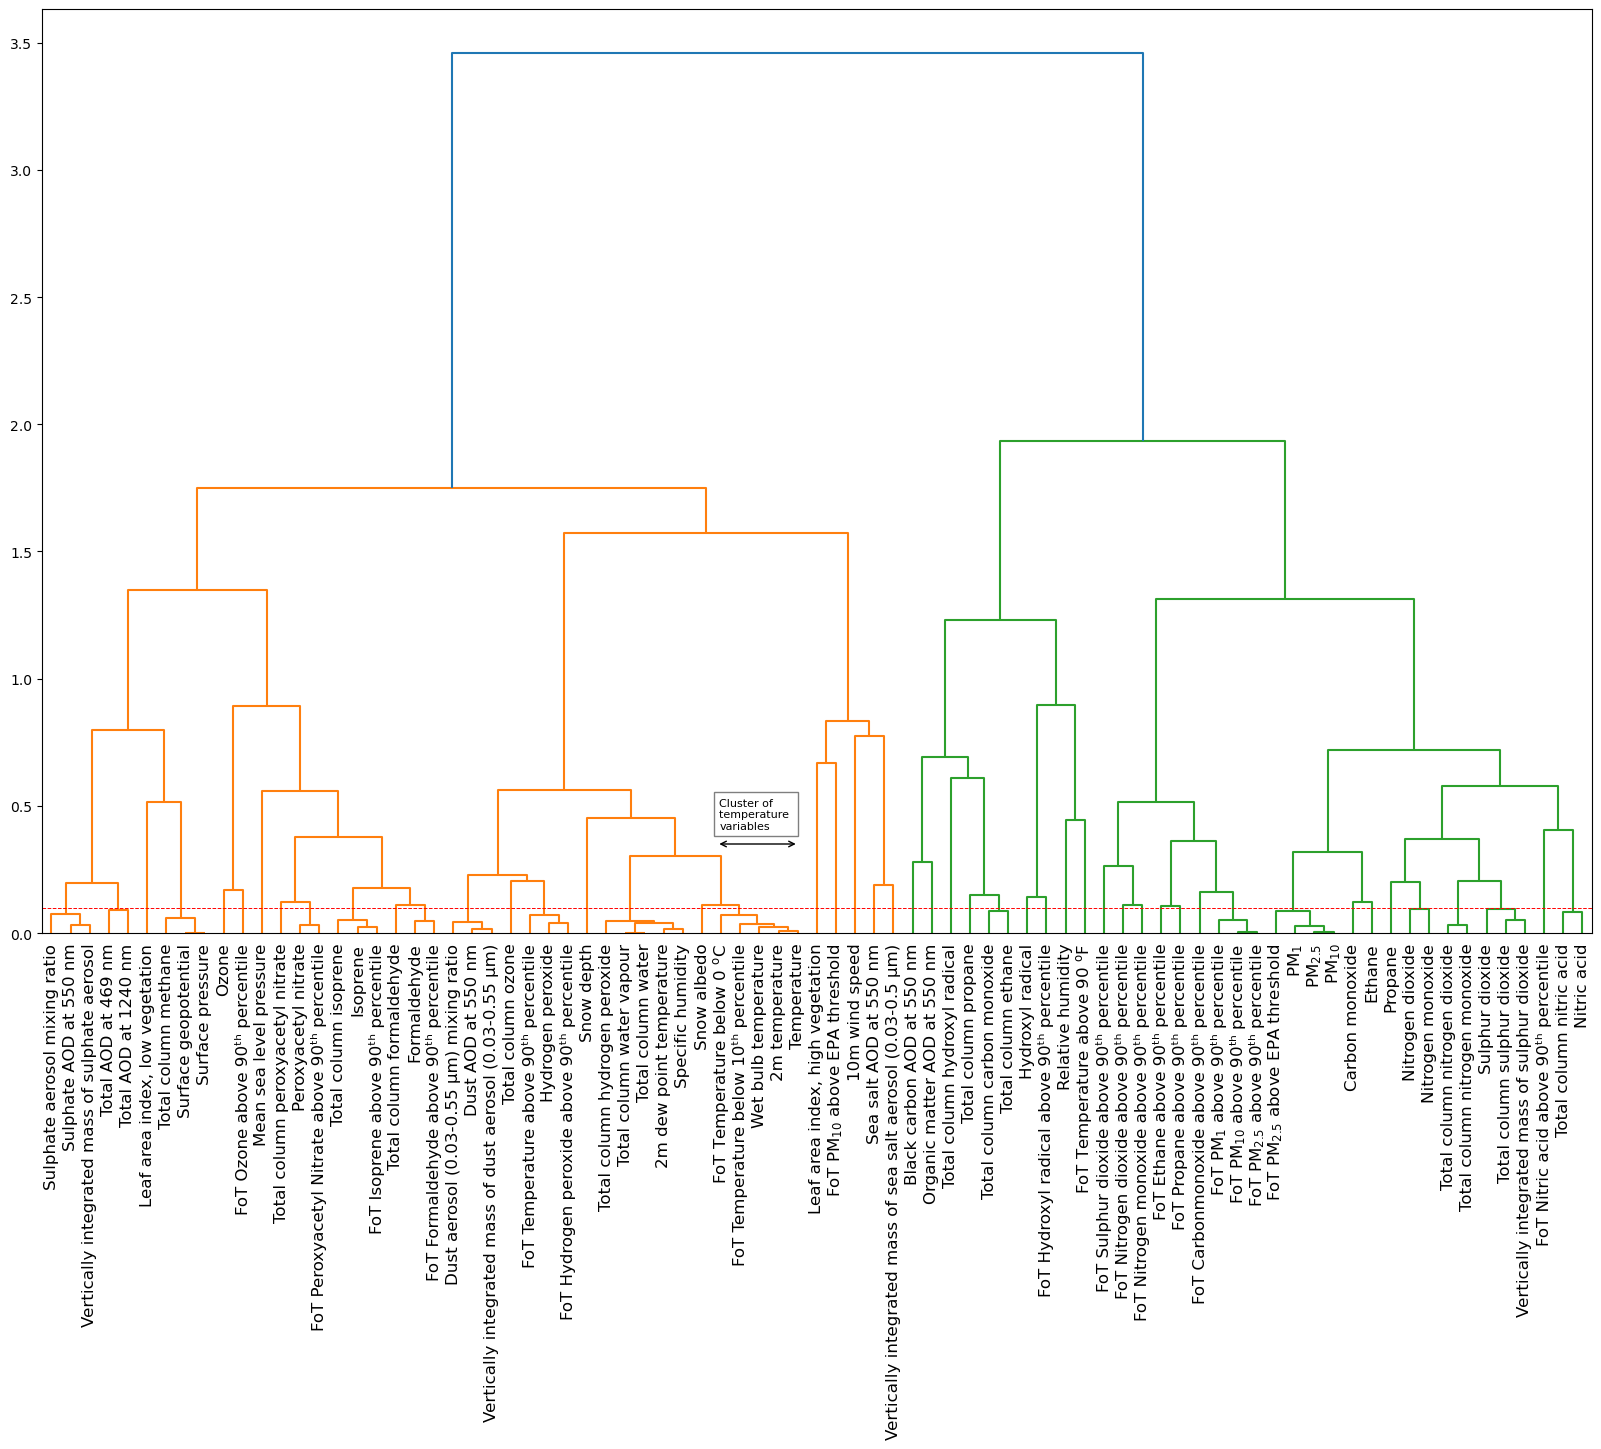

In [31]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr
fig, ax = plt.subplots(figsize=(20,12))

corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.to_list(), ax=ax, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))
plt.axhline(y=0.10, color='r', linestyle='--', label='Threshold at y=0.10', linewidth=0.7)

plt.xticks(fontsize=12) 
## create double arrow to annotate temperature cluster
plt.annotate(
    '',
    xy = (394, 0.35), # End point of the arrow
    xytext = (354, 0.35), # Start point of the arrow
    arrowprops = dict(
        arrowstyle = '<->',
        color = 'black',
        lw = 1,
        shrinkA = 0, # Prevents arrow from shrinking from start
        shrinkB = 0, # Prevents arrow from shrinking from end
    )
)

# Add a text box to the plot
plt.text(354, 0.41, 'Cluster of \ntemperature \nvariables', fontsize=8,
         bbox=dict(facecolor='white', alpha=0.5))

In [32]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 0.10, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features_names = X.columns[selected_features]
selected_features_names

Index(['2m dew point temperature', '2m temperature',
       'Black carbon AOD at 550 nm', 'Dust AOD at 550 nm',
       'Mean sea level pressure', 'Organic matter AOD at 550 nm', 'PM$_1$',
       'Sea salt AOD at 550 nm', 'Sulphate AOD at 550 nm',
       'Surface geopotential', 'Total AOD at 469 nm',
       'Total column carbon monoxide', 'Total column formaldehyde',
       'Total column hydroxyl radical', 'Total column isoprene',
       'Total column nitric acid', 'Total column nitrogen dioxide',
       'Total column ozone', 'Total column peroxyacetyl nitrate',
       'Total column propane', 'Total column sulphur dioxide',
       'Carbon monoxide', 'Ethane', 'Formaldehyde', 'Hydrogen peroxide',
       'Hydroxyl radical', 'Nitrogen dioxide', 'Ozone', 'Peroxyacetyl nitrate',
       'Propane', 'Leaf area index, high vegetation',
       'Leaf area index, low vegetation', 'Snow albedo', 'Snow depth',
       'Vertically integrated mass of sea salt aerosol (0.03-0.5 µm)',
       'Relative hum

In [33]:
new_features = selected_features_names.to_list()

In [34]:
new_features.append('MeanLifeExpectency')
new_features

['2m dew point temperature',
 '2m temperature',
 'Black carbon AOD at 550 nm',
 'Dust AOD at 550 nm',
 'Mean sea level pressure',
 'Organic matter AOD at 550 nm',
 'PM$_1$',
 'Sea salt AOD at 550 nm',
 'Sulphate AOD at 550 nm',
 'Surface geopotential',
 'Total AOD at 469 nm',
 'Total column carbon monoxide',
 'Total column formaldehyde',
 'Total column hydroxyl radical',
 'Total column isoprene',
 'Total column nitric acid',
 'Total column nitrogen dioxide',
 'Total column ozone',
 'Total column peroxyacetyl nitrate',
 'Total column propane',
 'Total column sulphur dioxide',
 'Carbon monoxide',
 'Ethane',
 'Formaldehyde',
 'Hydrogen peroxide',
 'Hydroxyl radical',
 'Nitrogen dioxide',
 'Ozone',
 'Peroxyacetyl nitrate',
 'Propane',
 'Leaf area index, high vegetation',
 'Leaf area index, low vegetation',
 'Snow albedo',
 'Snow depth',
 'Vertically integrated mass of sea salt aerosol (0.03-0.5 µm)',
 'Relative humidity',
 '10m wind speed',
 'FoT Carbonmonoxide above 90ᵗʰ percentile',
 'Fo

In [35]:
len(new_features)

50

In [36]:
## select features that are easy to interpret from a cluster of features

remove= ["Sulphate AOD at 550 nm",                          ## replace by Sulphate aerosol mixing ratio 
                     "Surface geopotential" ,               ## replace by surface pressure
                    "Total column isoprene",                ## replace by isoprene
                     "Dust AOD at 550 nm",                  ## replace by dust aerosol 0.03-0.55 um mixing ratio
                     "2m temperature",                      ## replace by Wetbulb temperature   
                     "FoT PM$_{10}$ above 90ᵗʰ percentile", ## replace by FoT pm2.5 above 90th percentile
                      "PM$_1$",                             ## replace by PM2.5
                      "Total column sulphur dioxide",       ## replace by sulphur dioxide
                      "Total column nitric acid"            ## nitric acid

        ]

new_list=[]                             ## remove the features in above list
for i in new_features:
    if i not in remove:
        new_list.append(i)

## add these features

added_features=['Sulphate aerosol mixing ratio','Surface pressure','Isoprene', 'Dust aerosol (0.03-0.55 µm) mixing ratio', 'Wet bulb temperature',
                    'FoT PM$_{2.5}$ above 90ᵗʰ percentile','PM$_{2.5}$','Sulphur dioxide','Nitric acid']
for item in added_features:
    new_list.append(item)


In [37]:
new_features = new_list

In [38]:
new_features

['2m dew point temperature',
 'Black carbon AOD at 550 nm',
 'Mean sea level pressure',
 'Organic matter AOD at 550 nm',
 'Sea salt AOD at 550 nm',
 'Total AOD at 469 nm',
 'Total column carbon monoxide',
 'Total column formaldehyde',
 'Total column hydroxyl radical',
 'Total column nitrogen dioxide',
 'Total column ozone',
 'Total column peroxyacetyl nitrate',
 'Total column propane',
 'Carbon monoxide',
 'Ethane',
 'Formaldehyde',
 'Hydrogen peroxide',
 'Hydroxyl radical',
 'Nitrogen dioxide',
 'Ozone',
 'Peroxyacetyl nitrate',
 'Propane',
 'Leaf area index, high vegetation',
 'Leaf area index, low vegetation',
 'Snow albedo',
 'Snow depth',
 'Vertically integrated mass of sea salt aerosol (0.03-0.5 µm)',
 'Relative humidity',
 '10m wind speed',
 'FoT Carbonmonoxide above 90ᵗʰ percentile',
 'FoT Ethane above 90ᵗʰ percentile',
 'FoT Hydroxyl radical above 90ᵗʰ percentile',
 'FoT Nitric acid above 90ᵗʰ percentile',
 'FoT Nitrogen dioxide above 90ᵗʰ percentile',
 'FoT Nitrogen monoxide 

# Estimate by getting rid of collinear features

In [39]:
full_df = full_df.loc[:, new_features]
full_df

,2m dew point temperature,Black carbon AOD at 550 nm,Mean sea level pressure,Organic matter AOD at 550 nm,Sea salt AOD at 550 nm,Total AOD at 469 nm,Total column carbon monoxide,Total column formaldehyde,Total column hydroxyl radical,Total column nitrogen dioxide,Total column ozone,Total column peroxyacetyl nitrate,Total column propane,Carbon monoxide,Ethane,Formaldehyde,Hydrogen peroxide,Hydroxyl radical,Nitrogen dioxide,Ozone,Peroxyacetyl nitrate,Propane,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Vertically integrated mass of sea salt aerosol (0.03-0.5 µm),Relative humidity,10m wind speed,FoT Carbonmonoxide above 90ᵗʰ percentile,FoT Ethane above 90ᵗʰ percentile,FoT Hydroxyl radical above 90ᵗʰ percentile,FoT Nitric acid above 90ᵗʰ percentile,FoT Nitrogen dioxide above 90ᵗʰ percentile,FoT Nitrogen monoxide above 90ᵗʰ percentile,FoT Ozone above 90ᵗʰ percentile,FoT Propane above 90ᵗʰ percentile,FoT Sulphur dioxide above 90ᵗʰ percentile,FoT PM$_{10}$ above EPA threshold,FoT Temperature above 90 $\mathrm{^o F}$,MeanLifeExpectency,Sulphate aerosol mixing ratio,Surface pressure,Isoprene,Dust aerosol (0.03-0.55 µm) mixing ratio,Wet bulb temperature,FoT PM$_{2.5}$ above 90ᵗʰ percentile,PM$_{2.5}$,Sulphur dioxide,Nitric acid
0,285.629269414872169,0.00757124815486,101746.46078524258337,0.097522246908886,0.00860619294015,0.288798537560071,0.000984550381998,0.000003599970514,0.000000004853489,0.000004130302193,0.006426156201957,0.000008713431766,0.00000074020297,0.000000230284119,0.000000000705993,0.000000003513651,0.000000000741261,0.000000000000028,0.000000010235872,0.00000005814554,0.000000003056157,0.000000000328437,3.904460199286052,2.618741604547198,0.879750469058084,0.000000093784908,0.000000220848889,71.152047054515833,0.209342152896552,19.623287671232877,16.404109589041095,22.979452054794521,21.472602739726028,13.493150684931507,3.869863013698630,45.376712328767120,7.705479452054795,16.780821917808218,0.034246575342466,0.000000000000000,74.628765329999993,0.00000000404404,100086.817007783130975,0.000000014604292,0.000000000654884,14.185547266162992,30.753424657534246,0.000000019601377,0.000000009229008,0.000000001474772
1,289.075082204243699,0.007386436848696,101714.38567138351209,0.080536809563287,0.013378239581773,0.25854819556795,0.000938742452444,0.000002695483373,0.000000004901349,0.000002983662698,0.006262634883947,0.000006770110044,0.000000668124521,0.000000181097315,0.000000000603835,0.000000001813065,0.000000000839633,0.000000000000043,0.000000006039749,0.000000063545074,0.000000001913777,0.000000000255961,2.493748263318578,1.556460793604144,0.87998489125148,0.0,0.000000332156531,74.39917284407359,0.42506917399947,6.061643835616438,8.390410958904109,29.143835616438356,23.972602739726025,2.500000000000000,0.719178082191781,56.506849315068500,1.575342465753425,0.376712328767123,0.000000000000000,0.000000000000000,76.661419230000007,0.000000003376943,101507.029992429539561,0.000000003807398,0.000000000693319,16.735605496466448,12.979452054794521,0.000000014405518,0.000000004951391,0.000000001664988
2,285.84173359686946,0.007456527906878,101751.023443022204447,0.094202817435168,0.009648836533317,0.278663173722528,0.00097113904724,0.000003493466708,0.000000004852262,0.000003768096164,0.006383518344924,0.000008323164917,0.000000720062676,0.000000225396546,0.000000000685152,0.000000003130391,0.000000000760942,0.000000000000028,0.00000000807493,0.000000055329099,0.000000002668089,0.000000000302966,4.174570187840095,2.367511530630567,0.879915804230056,0.0,0.000000245350288,71.229239958483802,0.169872508900564,17.910958904109588,14.828767123287671,23.493150684931507,19.246575342465754,6.678082191780822,2.294520547945206,42.397260273972606,5.513698630136987,0.136986301369863,0.136986301369863,0.068493150684932,74.047810630000001,0.000000003173645,100218.776953070439049,0.000000013132761,0.000000000696949,14.652120108679608,26.849315068493151,0.000000018304776,0.000000003391913,0.0000

In [40]:
## Lets create a Train-Test set

features=full_df.drop('MeanLifeExpectency',axis=1)
target=full_df['MeanLifeExpectency'].copy()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20) 

In [41]:
## initial results

forest_reg=RandomForestRegressor(n_jobs=-1)
forest_reg.fit(X_train, y_train)

train_prediction=forest_reg.predict(X_train)

mse_train=mean_squared_error(y_train, train_prediction)
rmse_train=np.sqrt(mse_train)
rmse_train=int(rmse_train*100)/100 ## display only two digits without rounding

print('The train RMSE :::', '%.2f' % rmse_train)

The train RMSE ::: 0.46


In [42]:
## lets do a cross-validation to identify overfitting and test if there is variation in the output result,
## based on variability of the input data

scores=cross_val_score(forest_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=2, n_jobs=6) ## can select other scoring as well
                                                                          ## n_jobs uses the number of cores
rmse_scores=np.sqrt(-scores)
sd_rmse=rmse_scores.std()
avg_score=rmse_scores.mean()

In [43]:
print(f'RMSE scores for each fold: {rmse_scores}')
print(f'Mean RMSE score: {avg_score}')
print(f'Standard deviation of RMSE scores: {sd_rmse}')

RMSE scores for each fold: [1.38048388 1.36742084]
Mean RMSE score: 1.373952357510178
Standard deviation of RMSE scores: 0.006531522313474758


In [44]:
%%time
## lets optimize the hyperparameters
forest_reg=RandomForestRegressor(n_jobs=-1, oob_score=True) ## also include oob score. this can be removed if not necessary

hyper_parameters=[{'n_estimators':[20, 30],'max_features': [10], 'max_depth':[100],
                                                              'min_samples_split':[ 10]}]
grid_search=GridSearchCV(forest_reg,hyper_parameters,cv=2,scoring="neg_mean_squared_error",return_train_score=True, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\Users\Shisir\.conda\envs\Weather_Prediction\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Shisir\.conda\envs\Weather_Prediction\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


CPU times: total: 1min 12s
Wall time: 7.22 s


,estimator,RandomForestR...ob_score=True)
,param_grid,"[{'max_depth': [100], 'max_features': [10], 'min_samples_split': [10], 'n_estimators': [20, 30]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,2
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [45]:
grid_search.best_estimator_

,n_estimators,30
,criterion,'squared_error'
,max_depth,100
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [46]:
## lets now select the model. This will be used later
final_model=grid_search.best_estimator_

In [47]:
## fit the model and find the error in the traning set

final_model.fit(X_train,y_train)

train_prediction=final_model.predict(X_train)

mse_train=mean_squared_error(y_train, train_prediction)
rmse_train=np.sqrt(mse_train)
rmse_train=int(rmse_train*100)/100 ## display only two digits without rounding

print('The train RMSE :::', '%.2f' % rmse_train)

The train RMSE ::: 0.74


In [48]:
oob_score=final_model.oob_score_
print(f'OOB score is: {oob_score:.2}') ## oob_score_ is calucalated as R$^2$ between true and estimated 

OOB score is: 0.68


In [49]:
## The test prediction

test_prediction=final_model.predict(X_test)

mse_test=mean_squared_error(y_test,test_prediction)
rmse_test=np.sqrt(mse_test)
rmse_test=int(rmse_test*100)/100 

print('The test RMSE :::', '%.2f' % rmse_test)

The test RMSE ::: 1.38


In [50]:
## the train r square

train_r_sq=(pearsonr(y_train,train_prediction)[0])**2
corr_train=int(train_r_sq*100)/100 ## display only two digits without rounding

print('The train r_sq :::', '%.2f' % corr_train)

The train r_sq ::: 0.91


In [51]:
## The test r square

test_r_sq=(pearsonr(y_test,test_prediction)[0])**2
corr_test=int(test_r_sq*100)/100 ## display only two digits without rounding

print('The test r_sq :::', '%.2f' % corr_test)

The test r_sq ::: 0.68


In [52]:
## calculate the adjusted r square

## in training set

n_train=X_train.shape[0] ## number of samples in training set
n_test=X_test.shape[0]  ## number of samples in test set
p=X_train.shape[1] ## number of features, which is the same in train and test set

train_adjusted_r2=1-(1-corr_train)*((n_train-1)/(n_train-p-1))
train_adjusted_r2=int(train_adjusted_r2*100)/100 ## display only two digits without rounding

test_adjusted_r2=1-(1-corr_test)*((n_test-1)/(n_test-p-1))
test_adjusted_r2=int(test_adjusted_r2*100)/100 ## display only two digits without rounding

print('The adjusted train r_sq :::', '%.2f' % train_adjusted_r2)
print('The adjusted test r_sq :::', '%.2f' % test_adjusted_r2)

The adjusted train r_sq ::: 0.90
The adjusted test r_sq ::: 0.67


In [53]:
## steps to convert train and test to pandas dataframe. This step is necessary to plot in seaborn

y_train_np=y_train.to_numpy() ## convert dtype to numpy to plot from seaborn
y_test_np=y_test.to_numpy() 

df1=pd.DataFrame(y_train_np, columns=['Actual'])
df2=pd.DataFrame(train_prediction, columns=['Estimated'])
df3=pd.concat([df1, df2],axis=1)  ## concatenate the columns
df3['Label']='Train'

df4=pd.DataFrame(y_test_np, columns=['Actual'])
df5=pd.DataFrame(test_prediction, columns=['Estimated'])
df6=pd.concat([df4, df5],axis=1)
df6['Label']='Test'

sns_df=pd.concat([df3,df6])

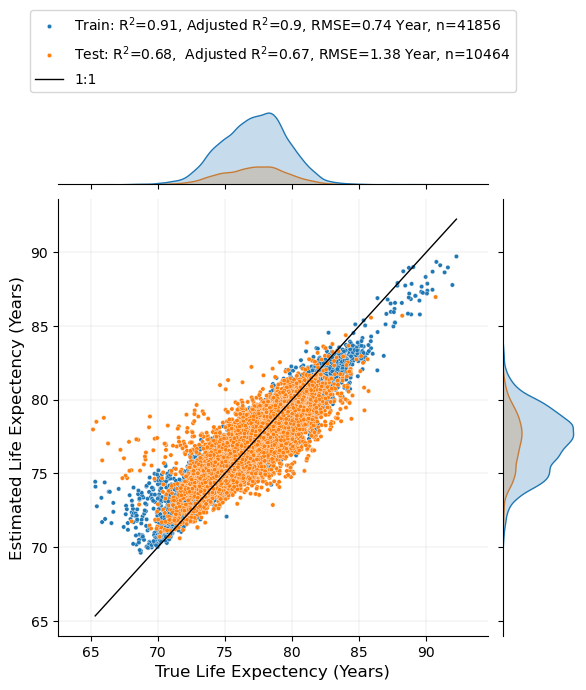

In [54]:
## scatter plot in seaborn

g=sns.jointplot(data=sns_df, x='Actual', y='Estimated', kind="scatter", hue='Label',s=10)
plt.grid(axis='both',linewidth=0.15)

p1 = max(max(train_prediction), max(y_train))
p2 = min(min(train_prediction), min(y_train))

g.ax_joint.plot([p1, p2], [p1, p2], color='k',linewidth=1, label='1:1')

# Customize the legend
handles, labels = g.ax_joint.get_legend_handles_labels()  



g.ax_joint.legend(handles=handles,  
    labels=[ f'Train: R$^2$={corr_train}, Adjusted R$^2$={train_adjusted_r2}, RMSE={rmse_train} Year, n={len(X_train)}', 
        f'Test: R$^2$={corr_test},  Adjusted R$^2$={test_adjusted_r2}, RMSE={rmse_test} Year, n={len(X_test)}','1:1'],
                        title=None)

sns.move_legend(g.ax_joint, "upper center", bbox_to_anchor=(0.5, 1.45))

g.set_axis_labels(r'True Life Expectency (Years)', r'Estimated Life Expectency (Years)',fontsize=12)

plt.show()

In [55]:
df3

,Actual,Estimated,Label
0,78.485035069999995,78.638573856692375,Train
1,77.592212799999999,77.888682730064019,Train
2,77.376702219999999,77.293199927272823,Train
3,77.557574529999997,78.512507036621912,Train
4,74.034468820000001,75.165112460071995,Train
...,...,...,...
41851,77.806761750000007,78.501998002511087,Train
41852,79.363486699999996,79.276952595078612,Train
41853,79.863254209999994,79.344741280027662,Train
41854,79.652747120000001,79.548618109289990,Train


In [56]:
df6

,Actual,Estimated,Label
0,79.214244769999993,79.235890482709337,Test
1,73.114041959999994,74.552863171394449,Test
2,78.288365040000002,78.307125602027028,Test
3,75.885623089999996,76.765918059053377,Test
4,75.823975790000006,77.158791044885305,Test
...,...,...,...
10459,77.548603130000004,76.602307003255916,Test
10460,78.605273159999996,78.181546466583185,Test
10461,77.533685259999999,79.060947517205662,Test
10462,71.637100340000003,72.747514062548674,Test


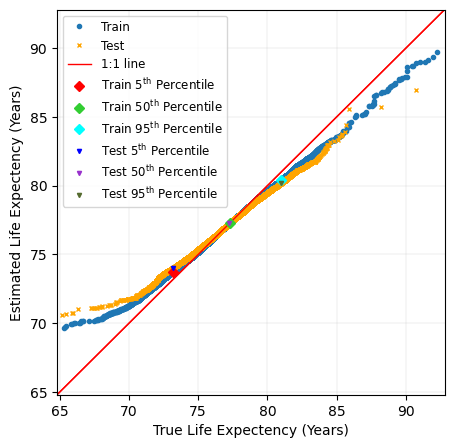

In [57]:
## Lets plot the quantile-quantile plot

fig, ax = plt.subplots(figsize=(5,5))

pp_x = sm.ProbPlot(y_train, fit=False)
pp_y = sm.ProbPlot(train_prediction, fit=False)


qq = pp_y.qqplot(marker='o',markersize=3,other=pp_x,ax=ax, label='Train') ## qq plot for train data
sm.qqline(ax=ax, line='45', fmt='r',linewidth=1)

pp_xx = sm.ProbPlot(y_test, fit=False)
pp_yy = sm.ProbPlot(test_prediction, fit=False)

## overlay qq plot for test data
qqq = pp_yy.qqplot(xlabel='True Life Expectency (Years)',ylabel='Estimated Life Expectency (Years)',
                            marker='x',markersize=3,other=pp_xx,ax=ax,markeredgecolor = 'orange',
                                      markerfacecolor = 'orange', label='Test')

sm.qqline(qq.axes[0], line='45', fmt='r',linewidth=1, label='1:1 line')


## find the percentiles

train_05_actual = df3['Actual'].quantile(0.05)
train_50_actual = df3['Actual'].quantile(0.50)
train_95_actual = df3['Actual'].quantile(0.95)

train_05_estimated = df3['Estimated'].quantile(0.05)
train_50_estimated = df3['Estimated'].quantile(0.50)
train_95_estimated = df3['Estimated'].quantile(0.95)

test_05_actual = df6['Actual'].quantile(0.05)
test_50_actual = df6['Actual'].quantile(0.50)
test_95_actual = df6['Actual'].quantile(0.95)

test_05_estimated = df6['Estimated'].quantile(0.05)
test_50_estimated = df6['Estimated'].quantile(0.50)
test_95_estimated = df6['Estimated'].quantile(0.95)

## plot the percentiles

plt.plot(train_05_actual,train_05_estimated, marker="D",markersize=5,color="red",linestyle ='None',
         label="Train $\\mathrm{5^{th}}$ Percentile")
plt.plot(train_50_actual,train_50_estimated, marker="D",markersize=5,color="limegreen",linestyle ='None',
         label="Train $\\mathrm{50^{th}}$ Percentile")
plt.plot(train_95_actual,train_95_estimated, marker="D",markersize=5,color="Cyan",linestyle ='None',
         label="Train $\\mathrm{95^{th}}$ Percentile")

plt.plot(test_05_actual,test_05_estimated, marker="v",markersize=3,color="blue",linestyle ='None',
         label="Test $\\mathrm{5^{th}}$ Percentile")
plt.plot(test_50_actual,test_50_estimated, marker="v",markersize=3,color="darkorchid",linestyle ='None',
         label="Test $\\mathrm{50^{th}}$ Percentile")
plt.plot(test_95_actual,test_95_estimated, marker="v",markersize=3,color="darkolivegreen",linestyle ='None',
         label="Test $\\mathrm{95^{th}}$ Percentile")


plt.grid(axis='both',linewidth=0.15)
plt.legend(fontsize=8.5)
plt.show()

In [58]:
train_permutation = permutation_importance(final_model, X_train, y_train, 
                                            n_jobs = 6, ## number of cores to run
                                             n_repeats = 10) ## number of times to shuffle, default is 5

In [59]:
mean_val=train_permutation['importances_mean'] ## mean feature importance
std_value=train_permutation['importances_std'] ## standard deviation after shuffling 9 times
feature_names=X_train.columns  ## get features names

mean_importance=sorted(zip(mean_val, feature_names), reverse=True) 
std_importance=sorted(zip(std_value, feature_names), reverse=True)

In [60]:
mean_imp = pd.DataFrame(mean_val, columns=['Mean Weight'])
std_imp = pd.DataFrame(std_value, columns=['Standard Deviation'])
feature_names=list(features.columns.values) ## get list of features as list
feature_df = pd.DataFrame(feature_names, columns=['Feature'])
train_FI = pd.concat([feature_df,mean_imp, std_imp ], axis=1) 
# Sort in descending order
train_FI = train_FI.sort_values(['Mean Weight'], ascending=[False])

In [61]:
train_FI

,Feature,Mean Weight,Standard Deviation
44,Wet bulb temperature,0.100808343698979,0.000616883203317
23,"Leaf area index, low vegetation",0.097019011141457,0.001081580152593
15,Formaldehyde,0.085081408246470,0.000908716278849
22,"Leaf area index, high vegetation",0.079009343453983,0.000794575621525
36,FoT Propane above 90ᵗʰ percentile,0.075964695568602,0.000451528666809
41,Surface pressure,0.075062755823642,0.000521227165576
20,Peroxyacetyl nitrate,0.062574539397083,0.000602718731473
0,2m dew point temperature,0.061922292203796,0.000401456676726
7,Total column formaldehyde,0.058115025178988,0.000413040681510
42,Isoprene,0.050435714274997,0.000521040049211


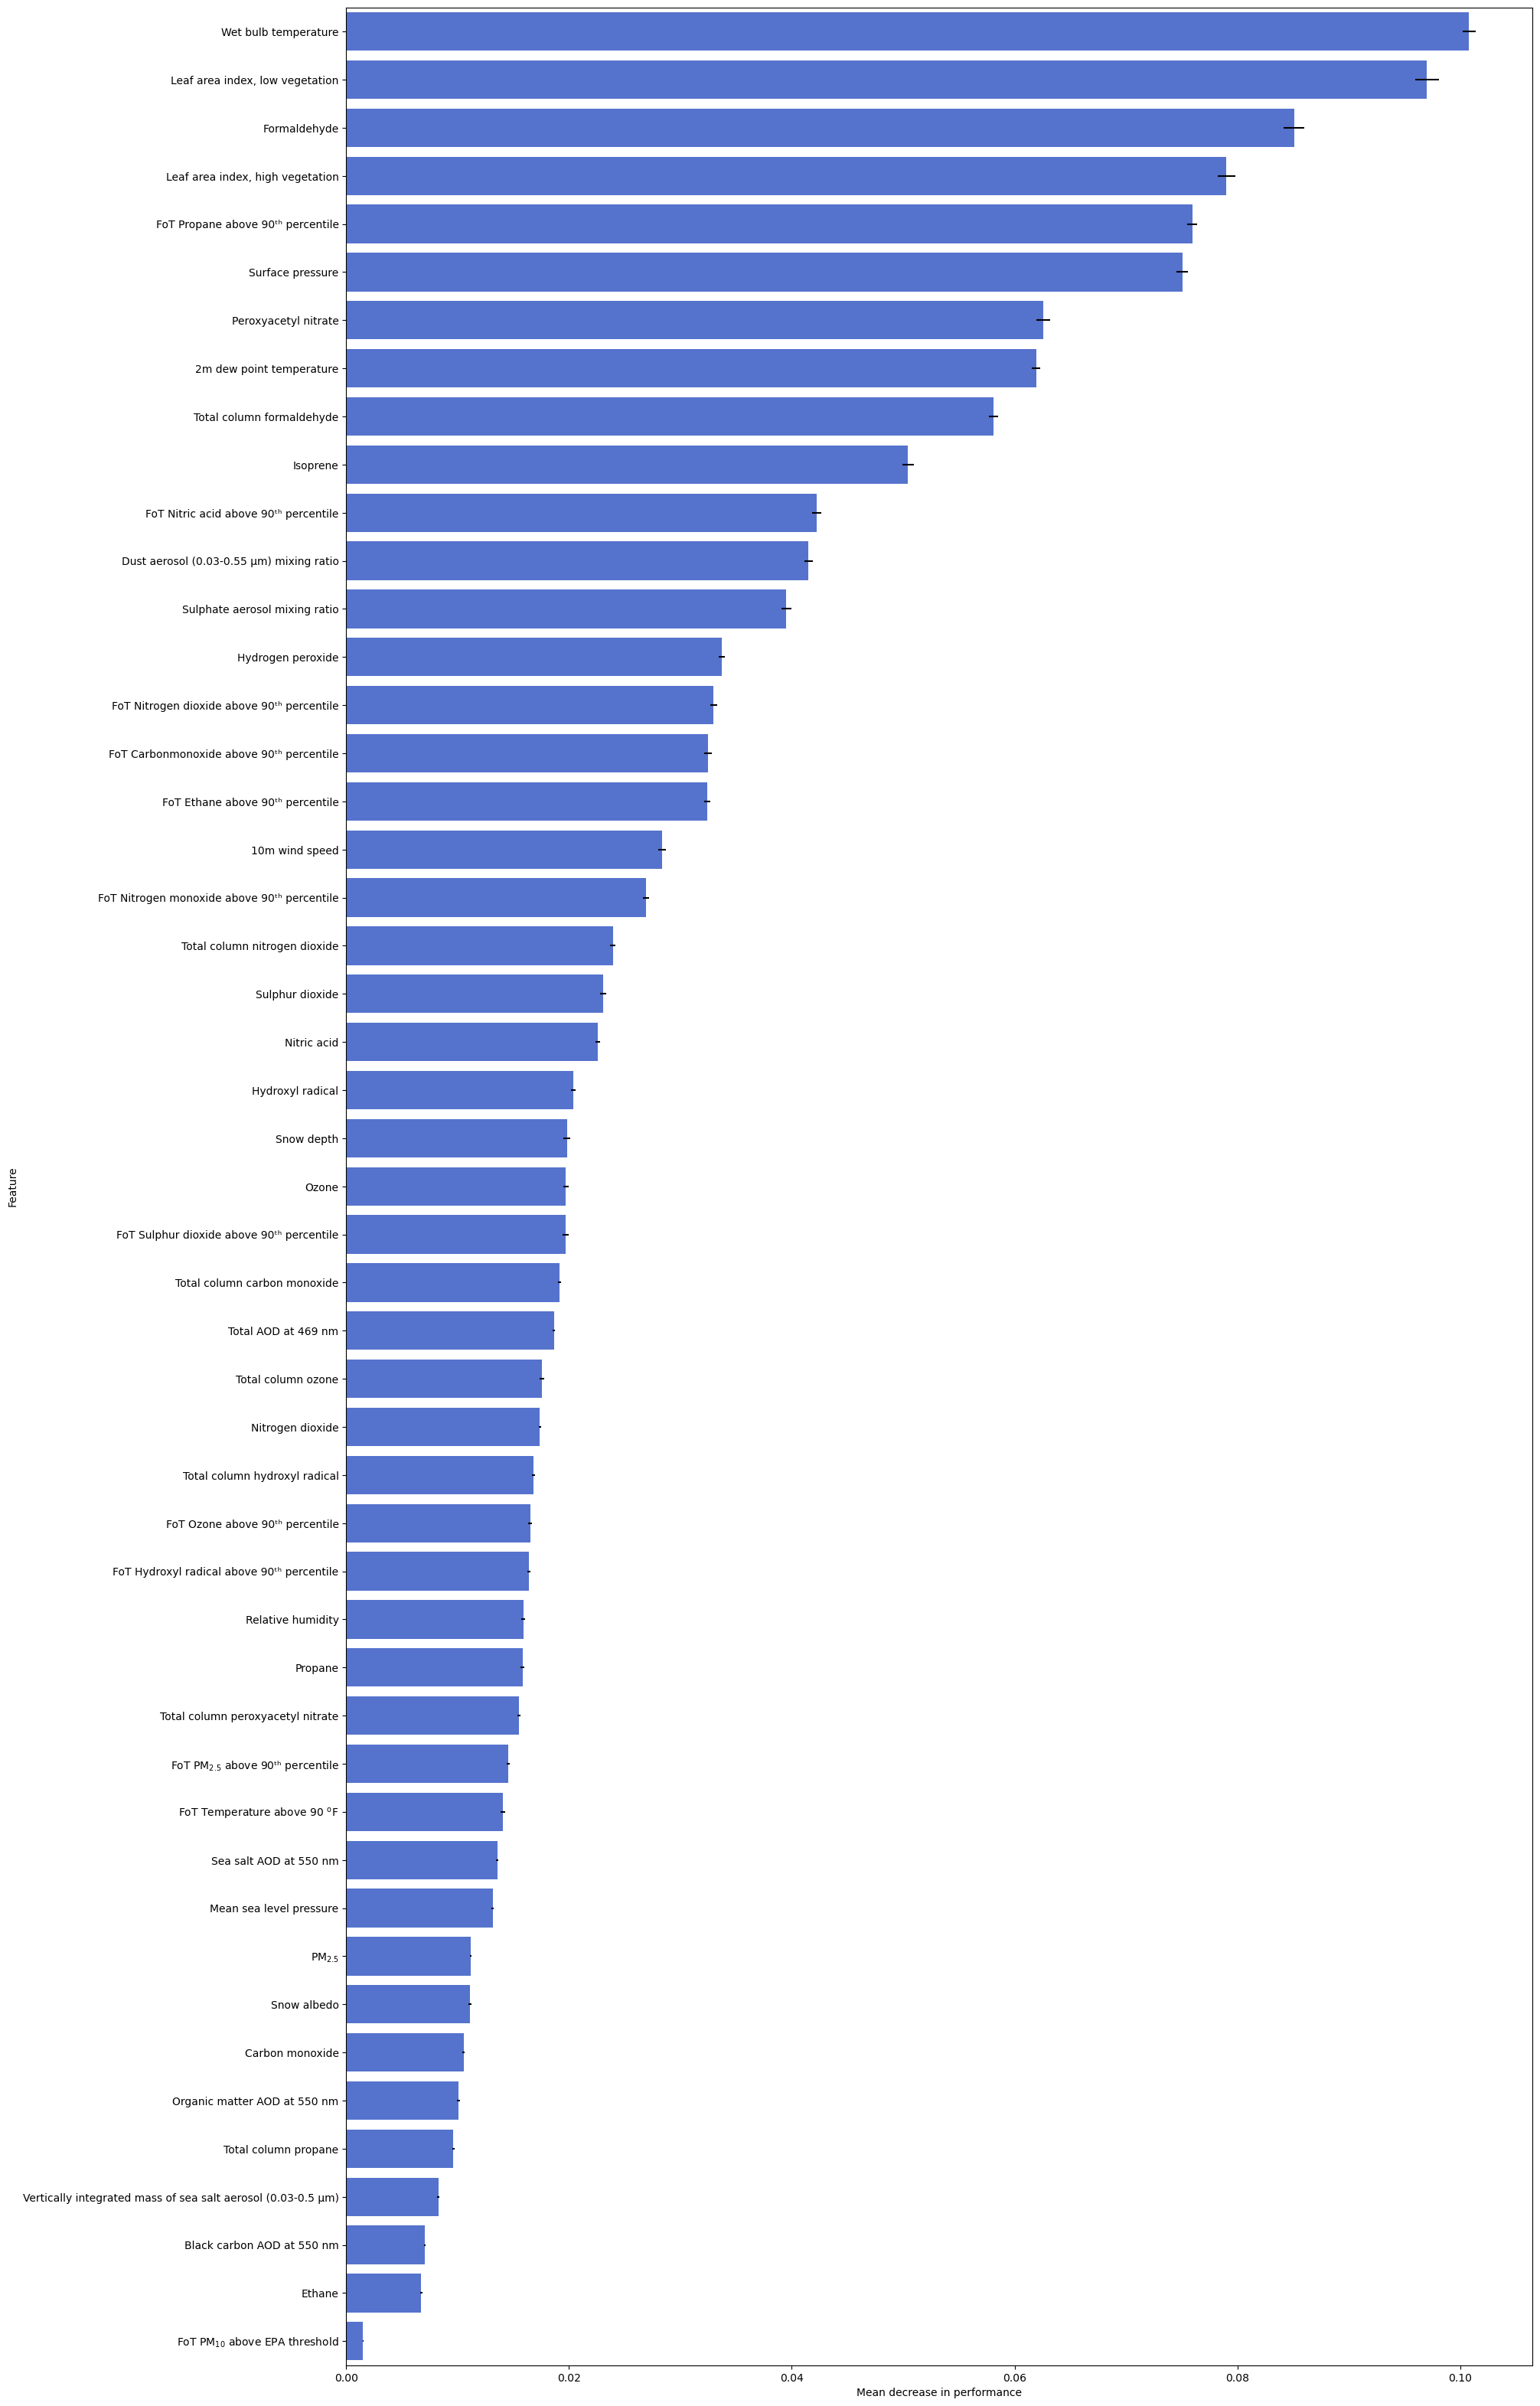

In [62]:
# Plot with custom error bars
fig, ax = plt.subplots(figsize=(20, 40))

sns.barplot(
    data=train_FI,
    x = "Mean Weight",
    y = "Feature",
    xerr = train_FI["Standard Deviation"],   # explicitly pass the std column
    capsize = 0.2,      # add caps to error bars
    color = "royalblue",
)


plt.xlabel("Mean decrease in performance")
plt.show()

In [63]:
train_FI_15 = train_FI.head(15)

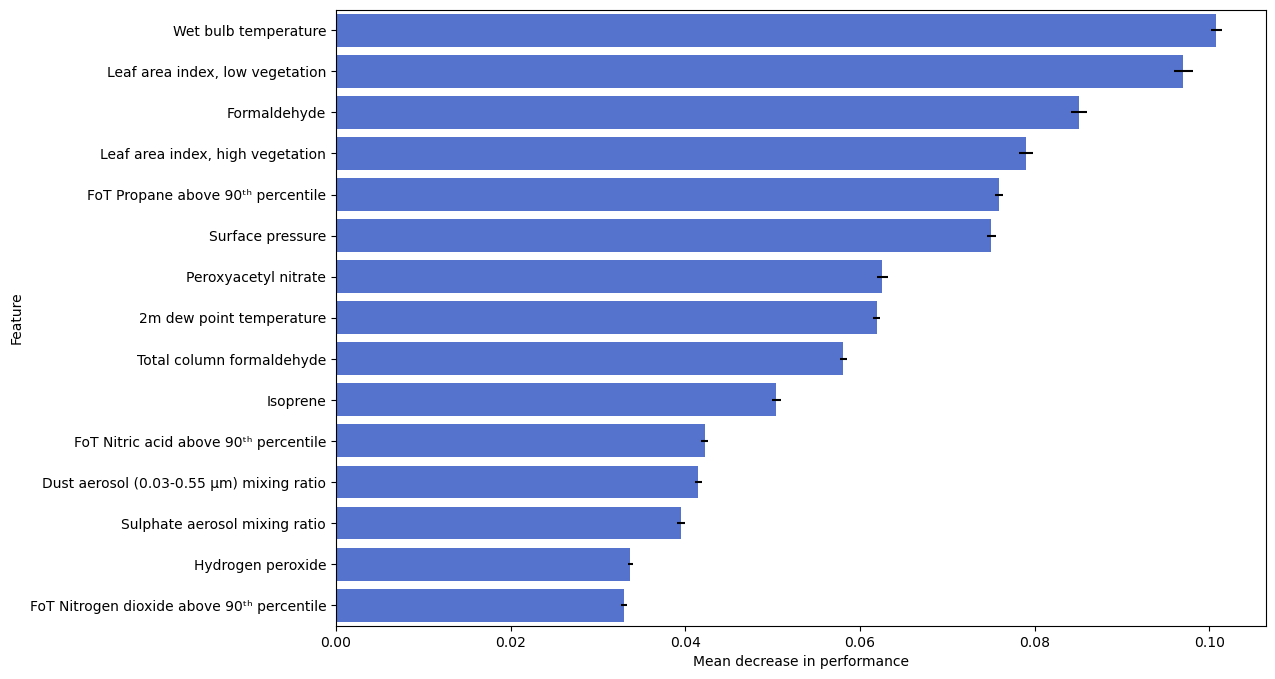

In [64]:
# Plot with custom error bars
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    data = train_FI_15,
    x = "Mean Weight",
    y = "Feature",
    xerr = train_FI_15["Standard Deviation"],   # explicitly pass the std column
    capsize = 0.2,      # add caps to error bars
    color = "royalblue",
)

plt.xlabel("Mean decrease in performance")
plt.show()

In [65]:
#shap_values = shap.TreeExplainer(final_model).shap_values(X_train)

In [66]:
#shap.summary_plot(shap_values, X_train,max_display=49)

In [67]:
#shap.summary_plot(shap_values, X_train,max_display=15)

In [68]:
## these changes were necessary as the xlabel went beyond the figure, so fontsize needs to be adjusted

#shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=49, show=False)
#fig, ax = plt.gcf(), plt.gca()
#ax.set_xlabel('mean(|SHAP value|) (average impact on model output magnitude)', fontsize=5)

#plt.show()


In [69]:
## these changes were necessary as the xlabel went beyond the figure, so fontsize needs to be adjusted

#shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=15, show=False)
#fig, ax = plt.gcf(), plt.gca()
#ax.set_xlabel('mean(|SHAP value|) (average impact on model output magnitude)', fontsize=10)

#plt.show()


## Estimate by removing Total columns and AOD

In [71]:
full_df
full_df = full_df.drop(columns=['Organic matter AOD at 550 nm','Sea salt AOD at 550 nm','Black carbon AOD at 550 nm',	
                                'Total AOD at 469 nm','Total column carbon monoxide','Total column formaldehyde',
                                'Total column hydroxyl radical','Total column nitrogen dioxide',
                                'Total column peroxyacetyl nitrate','Vertically integrated mass of sea salt aerosol (0.03-0.5 \u00B5m)'])
full_df

,2m dew point temperature,Mean sea level pressure,Total column ozone,Total column propane,Carbon monoxide,Ethane,Formaldehyde,Hydrogen peroxide,Hydroxyl radical,Nitrogen dioxide,Ozone,Peroxyacetyl nitrate,Propane,"Leaf area index, high vegetation","Leaf area index, low vegetation",Snow albedo,Snow depth,Relative humidity,10m wind speed,FoT Carbonmonoxide above 90ᵗʰ percentile,FoT Ethane above 90ᵗʰ percentile,FoT Hydroxyl radical above 90ᵗʰ percentile,FoT Nitric acid above 90ᵗʰ percentile,FoT Nitrogen dioxide above 90ᵗʰ percentile,FoT Nitrogen monoxide above 90ᵗʰ percentile,FoT Ozone above 90ᵗʰ percentile,FoT Propane above 90ᵗʰ percentile,FoT Sulphur dioxide above 90ᵗʰ percentile,FoT PM$_{10}$ above EPA threshold,FoT Temperature above 90 $\mathrm{^o F}$,MeanLifeExpectency,Sulphate aerosol mixing ratio,Surface pressure,Isoprene,Dust aerosol (0.03-0.55 µm) mixing ratio,Wet bulb temperature,FoT PM$_{2.5}$ above 90ᵗʰ percentile,PM$_{2.5}$,Sulphur dioxide,Nitric acid
0,285.629269414872169,101746.46078524258337,0.006426156201957,0.00000074020297,0.000000230284119,0.000000000705993,0.000000003513651,0.000000000741261,0.000000000000028,0.000000010235872,0.00000005814554,0.000000003056157,0.000000000328437,3.904460199286052,2.618741604547198,0.879750469058084,0.000000093784908,71.152047054515833,0.209342152896552,19.623287671232877,16.404109589041095,22.979452054794521,21.472602739726028,13.493150684931507,3.869863013698630,45.376712328767120,7.705479452054795,16.780821917808218,0.034246575342466,0.000000000000000,74.628765329999993,0.00000000404404,100086.817007783130975,0.000000014604292,0.000000000654884,14.185547266162992,30.753424657534246,0.000000019601377,0.000000009229008,0.000000001474772
1,289.075082204243699,101714.38567138351209,0.006262634883947,0.000000668124521,0.000000181097315,0.000000000603835,0.000000001813065,0.000000000839633,0.000000000000043,0.000000006039749,0.000000063545074,0.000000001913777,0.000000000255961,2.493748263318578,1.556460793604144,0.87998489125148,0.0,74.39917284407359,0.42506917399947,6.061643835616438,8.390410958904109,29.143835616438356,23.972602739726025,2.500000000000000,0.719178082191781,56.506849315068500,1.575342465753425,0.376712328767123,0.000000000000000,0.000000000000000,76.661419230000007,0.000000003376943,101507.029992429539561,0.000000003807398,0.000000000693319,16.735605496466448,12.979452054794521,0.000000014405518,0.000000004951391,0.000000001664988
2,285.84173359686946,101751.023443022204447,0.006383518344924,0.000000720062676,0.000000225396546,0.000000000685152,0.000000003130391,0.000000000760942,0.000000000000028,0.00000000807493,0.000000055329099,0.000000002668089,0.000000000302966,4.174570187840095,2.367511530630567,0.879915804230056,0.0,71.229239958483802,0.169872508900564,17.910958904109588,14.828767123287671,23.493150684931507,19.246575342465754,6.678082191780822,2.294520547945206,42.397260273972606,5.513698630136987,0.136986301369863,0.136986301369863,0.068493150684932,74.047810630000001,0.000000003173645,100218.776953070439049,0.000000013132761,0.000000000696949,14.652120108679608,26.849315068493151,0.000000018304776,0.000000003391913,0.000000001363316
3,285.117221444791198,101744.124161676227232,0.006478358100203,0.00000076643544,0.000000235334185,0.00000000072361,0.000000003373964,0.000000000699918,0.000000000000028,0.000000013131751,0.000000056414364,0.000000003056251,0.000000000358899,3.638957935933739,2.754823872966046,0.878014749774689,0.000011574283667,72.651517962262062,0.247677504482458,21.301369863013701,17.294520547945204,21.712328767123289,23.938356164383563,24.246575342465754,7.020547945205480,42.260273972602739,9.863013698630137,34.075342465753423,0.205479452054795,0.000000000000000,73.057987400000002,0.000000004729935,99965.021140069555258,0.000000013479486,0.0000000006092,13.829282111100266,35.000000000000000,0.000000020307433,0.000000013603814,0.00000000160143
4,284.499985265741145,101752.892546598464833,0.006526528523785,0.000000785947342,0.00000024312

In [72]:
## Lets create a Train-Test set

features=full_df.drop('MeanLifeExpectency',axis=1)
target=full_df['MeanLifeExpectency'].copy()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20) 

In [73]:
## initial results

forest_reg=RandomForestRegressor(n_jobs=-1)
forest_reg.fit(X_train, y_train)

train_prediction=forest_reg.predict(X_train)

mse_train=mean_squared_error(y_train, train_prediction)
rmse_train=np.sqrt(mse_train)
rmse_train=int(rmse_train*100)/100 ## display only two digits without rounding

print('The train RMSE :::', '%.2f' % rmse_train)

The train RMSE ::: 0.46


In [74]:
## lets do a cross-validation to identify overfitting and test if there is variation in the output result,
## based on variability of the input data

scores=cross_val_score(forest_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv = 2, n_jobs = 6) ## can select other scoring as well
                                                                          ## n_jobs uses the number of cores
rmse_scores=np.sqrt(-scores)
sd_rmse=rmse_scores.std()
avg_score=rmse_scores.mean()

In [75]:
print(f'RMSE scores for each fold: {rmse_scores}')
print(f'Mean RMSE score: {avg_score}')
print(f'Standard deviation of RMSE scores: {sd_rmse}')

RMSE scores for each fold: [1.35493233 1.37908017]
Mean RMSE score: 1.3670062521142707
Standard deviation of RMSE scores: 0.01207392123448836


In [76]:
%%time
## lets optimize the hyperparameters
forest_reg=RandomForestRegressor(n_jobs=-1, oob_score=True) ## also include oob score. this can be removed if not necessary

hyper_parameters=[{'n_estimators':[20, 30],'max_features': [10], 'max_depth':[100],
                                                              'min_samples_split':[ 10]}]
grid_search=GridSearchCV(forest_reg,hyper_parameters,cv=2,scoring="neg_mean_squared_error",return_train_score=True, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\Users\Shisir\.conda\envs\Weather_Prediction\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Shisir\.conda\envs\Weather_Prediction\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


CPU times: total: 1min 16s
Wall time: 7.13 s


,estimator,RandomForestR...ob_score=True)
,param_grid,"[{'max_depth': [100], 'max_features': [10], 'min_samples_split': [10], 'n_estimators': [20, 30]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,2
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [77]:
grid_search.best_estimator_

,n_estimators,30
,criterion,'squared_error'
,max_depth,100
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [78]:
## fit the model and find the error in the traning set

final_model.fit(X_train,y_train)

train_prediction=final_model.predict(X_train)

mse_train=mean_squared_error(y_train, train_prediction)
rmse_train=np.sqrt(mse_train)
rmse_train=int(rmse_train*100)/100 ## display only two digits without rounding

print('The train RMSE :::', '%.2f' % rmse_train)

The train RMSE ::: 0.72


In [79]:
oob_score=final_model.oob_score_
print(f'OOB score is: {oob_score:.2}') ## oob_score_ is calucalated as R$^2$ between true and estimated 

OOB score is: 0.69


In [80]:
## The test prediction

test_prediction=final_model.predict(X_test)

mse_test=mean_squared_error(y_test,test_prediction)
rmse_test=np.sqrt(mse_test)
rmse_test=int(rmse_test*100)/100 

print('The test RMSE :::', '%.2f' % rmse_test)

The test RMSE ::: 1.30


In [81]:
## the train r square

train_r_sq=(pearsonr(y_train,train_prediction)[0])**2
corr_train=int(train_r_sq*100)/100 ## display only two digits without rounding

print('The train r_sq :::', '%.2f' % corr_train)

The train r_sq ::: 0.92


In [82]:
## The test r square

test_r_sq=(pearsonr(y_test,test_prediction)[0])**2
corr_test=int(test_r_sq*100)/100 ## display only two digits without rounding

print('The test r_sq :::', '%.2f' % corr_test)

The test r_sq ::: 0.72


In [83]:
## calculate the adjusted r square

## in training set

n_train=X_train.shape[0] ## number of samples in training set
n_test=X_test.shape[0]  ## number of samples in test set
p=X_train.shape[1] ## number of features, which is the same in train and test set

train_adjusted_r2=1-(1-corr_train)*((n_train-1)/(n_train-p-1))
train_adjusted_r2=int(train_adjusted_r2*100)/100 ## display only two digits without rounding

test_adjusted_r2=1-(1-corr_test)*((n_test-1)/(n_test-p-1))
test_adjusted_r2=int(test_adjusted_r2*100)/100 ## display only two digits without rounding

print('The adjusted train r_sq :::', '%.2f' % train_adjusted_r2)
print('The adjusted test r_sq :::', '%.2f' % test_adjusted_r2)

The adjusted train r_sq ::: 0.91
The adjusted test r_sq ::: 0.71


In [84]:
## steps to convert train and test to pandas dataframe. This step is necessary to plot in seaborn

y_train_np=y_train.to_numpy() ## convert dtype to numpy to plot from seaborn
y_test_np=y_test.to_numpy() 

df1=pd.DataFrame(y_train_np, columns=['Actual'])
df2=pd.DataFrame(train_prediction, columns=['Estimated'])
df3=pd.concat([df1, df2],axis=1)  ## concatenate the columns
df3['Label']='Train'

df4=pd.DataFrame(y_test_np, columns=['Actual'])
df5=pd.DataFrame(test_prediction, columns=['Estimated'])
df6=pd.concat([df4, df5],axis=1)
df6['Label']='Test'

sns_df=pd.concat([df3,df6])

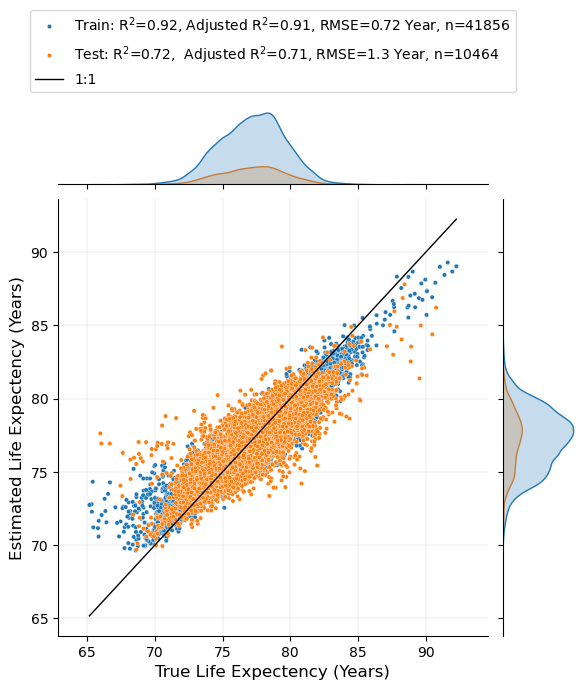

In [85]:
## scatter plot in seaborn

g=sns.jointplot(data=sns_df, x='Actual', y='Estimated', kind="scatter", hue='Label',s=10)
plt.grid(axis='both',linewidth=0.15)

p1 = max(max(train_prediction), max(y_train))
p2 = min(min(train_prediction), min(y_train))

g.ax_joint.plot([p1, p2], [p1, p2], color='k',linewidth=1, label='1:1')

# Customize the legend
handles, labels = g.ax_joint.get_legend_handles_labels()  



g.ax_joint.legend(handles=handles,  
    labels=[ f'Train: R$^2$={corr_train}, Adjusted R$^2$={train_adjusted_r2}, RMSE={rmse_train} Year, n={len(X_train)}', 
        f'Test: R$^2$={corr_test},  Adjusted R$^2$={test_adjusted_r2}, RMSE={rmse_test} Year, n={len(X_test)}','1:1'],
                        title=None)

sns.move_legend(g.ax_joint, "upper center", bbox_to_anchor=(0.5, 1.45))

g.set_axis_labels(r'True Life Expectency (Years)', r'Estimated Life Expectency (Years)',fontsize=12)

plt.show()

In [86]:
df3

,Actual,Estimated,Label
0,76.797001809999998,76.298680676072792,Train
1,76.894430569999997,77.402335184309308,Train
2,76.520408259999996,76.569268292370495,Train
3,76.193136170000002,77.195264016693656,Train
4,80.777178980000002,79.877546456731039,Train
...,...,...,...
41851,80.406840610000003,79.376789489925585,Train
41852,78.897013920000006,78.762580062901506,Train
41853,79.280474369999993,78.486673624034253,Train
41854,78.809765990000002,78.337151273790980,Train


In [87]:
df6

,Actual,Estimated,Label
0,78.964053590000006,77.961312149207018,Test
1,74.682091970000002,75.359274717652525,Test
2,75.871294969999994,76.372685192270495,Test
3,75.007348710000002,75.517777413333903,Test
4,79.489346119999993,79.130395400311926,Test
...,...,...,...
10459,81.288818399999997,80.158084048254935,Test
10460,81.016697710000003,79.499437471557329,Test
10461,78.881891690000003,78.366536735644075,Test
10462,79.610330200000007,78.653512488719443,Test


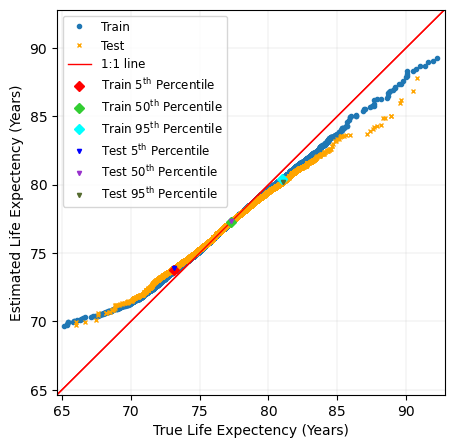

In [88]:
## Lets plot the quantile-quantile plot

fig, ax = plt.subplots(figsize=(5,5))

pp_x = sm.ProbPlot(y_train, fit=False)
pp_y = sm.ProbPlot(train_prediction, fit=False)


qq = pp_y.qqplot(marker='o',markersize=3,other=pp_x,ax=ax, label='Train') ## qq plot for train data
sm.qqline(ax=ax, line='45', fmt='r',linewidth=1)

pp_xx = sm.ProbPlot(y_test, fit=False)
pp_yy = sm.ProbPlot(test_prediction, fit=False)

## overlay qq plot for test data
qqq = pp_yy.qqplot(xlabel='True Life Expectency (Years)',ylabel='Estimated Life Expectency (Years)',
                            marker='x',markersize=3,other=pp_xx,ax=ax,markeredgecolor = 'orange',
                                      markerfacecolor = 'orange', label='Test')

sm.qqline(qq.axes[0], line='45', fmt='r',linewidth=1, label='1:1 line')


## find the percentiles

train_05_actual = df3['Actual'].quantile(0.05)
train_50_actual = df3['Actual'].quantile(0.50)
train_95_actual = df3['Actual'].quantile(0.95)

train_05_estimated = df3['Estimated'].quantile(0.05)
train_50_estimated = df3['Estimated'].quantile(0.50)
train_95_estimated = df3['Estimated'].quantile(0.95)

test_05_actual = df6['Actual'].quantile(0.05)
test_50_actual = df6['Actual'].quantile(0.50)
test_95_actual = df6['Actual'].quantile(0.95)

test_05_estimated = df6['Estimated'].quantile(0.05)
test_50_estimated = df6['Estimated'].quantile(0.50)
test_95_estimated = df6['Estimated'].quantile(0.95)

## plot the percentiles

plt.plot(train_05_actual,train_05_estimated, marker="D",markersize=5,color="red",linestyle ='None',
         label="Train $\\mathrm{5^{th}}$ Percentile")
plt.plot(train_50_actual,train_50_estimated, marker="D",markersize=5,color="limegreen",linestyle ='None',
         label="Train $\\mathrm{50^{th}}$ Percentile")
plt.plot(train_95_actual,train_95_estimated, marker="D",markersize=5,color="Cyan",linestyle ='None',
         label="Train $\\mathrm{95^{th}}$ Percentile")

plt.plot(test_05_actual,test_05_estimated, marker="v",markersize=3,color="blue",linestyle ='None',
         label="Test $\\mathrm{5^{th}}$ Percentile")
plt.plot(test_50_actual,test_50_estimated, marker="v",markersize=3,color="darkorchid",linestyle ='None',
         label="Test $\\mathrm{50^{th}}$ Percentile")
plt.plot(test_95_actual,test_95_estimated, marker="v",markersize=3,color="darkolivegreen",linestyle ='None',
         label="Test $\\mathrm{95^{th}}$ Percentile")


plt.grid(axis='both',linewidth=0.15)
plt.legend(fontsize=8.5)
plt.show()

In [89]:
train_permutation = permutation_importance(final_model, X_train, y_train, 
                                            n_jobs=6, ## number of cores to run
                                             n_repeats=2) ## number of times to shuffle, default is 5

In [90]:
mean_val=train_permutation['importances_mean'] ## mean feature importance
std_value=train_permutation['importances_std'] ## standard deviation after shuffling 9 times
feature_names=X_train.columns  ## get features names

mean_importance=sorted(zip(mean_val, feature_names), reverse=True) 
std_importance=sorted(zip(std_value, feature_names), reverse=True)

In [91]:
mean_imp = pd.DataFrame(mean_val, columns=['Mean Weight'])
std_imp = pd.DataFrame(std_value, columns=['Standard Deviation'])
feature_names=list(features.columns.values) ## get list of features as list
feature_df = pd.DataFrame(feature_names, columns=['Feature'])
train_FI = pd.concat([feature_df,mean_imp, std_imp ], axis=1) 
# Sort in descending order
train_FI = train_FI.sort_values(['Mean Weight'], ascending=[False])

In [92]:
train_FI

,Feature,Mean Weight,Standard Deviation
14,"Leaf area index, low vegetation",0.112074246265282,0.000831550686817
6,Formaldehyde,0.110406745429787,0.000934640557914
13,"Leaf area index, high vegetation",0.100525091026368,0.001381394899378
26,FoT Propane above 90ᵗʰ percentile,0.098073957281839,0.001047386848608
0,2m dew point temperature,0.097516814732123,0.000738884654683
31,Surface pressure,0.091420435629563,0.000276592869572
34,Wet bulb temperature,0.087246576341013,0.000821572541068
11,Peroxyacetyl nitrate,0.076428162075475,0.000003163860403
32,Isoprene,0.071759533460331,0.000520714027051
30,Sulphate aerosol mixing ratio,0.063779463312453,0.000243319671956


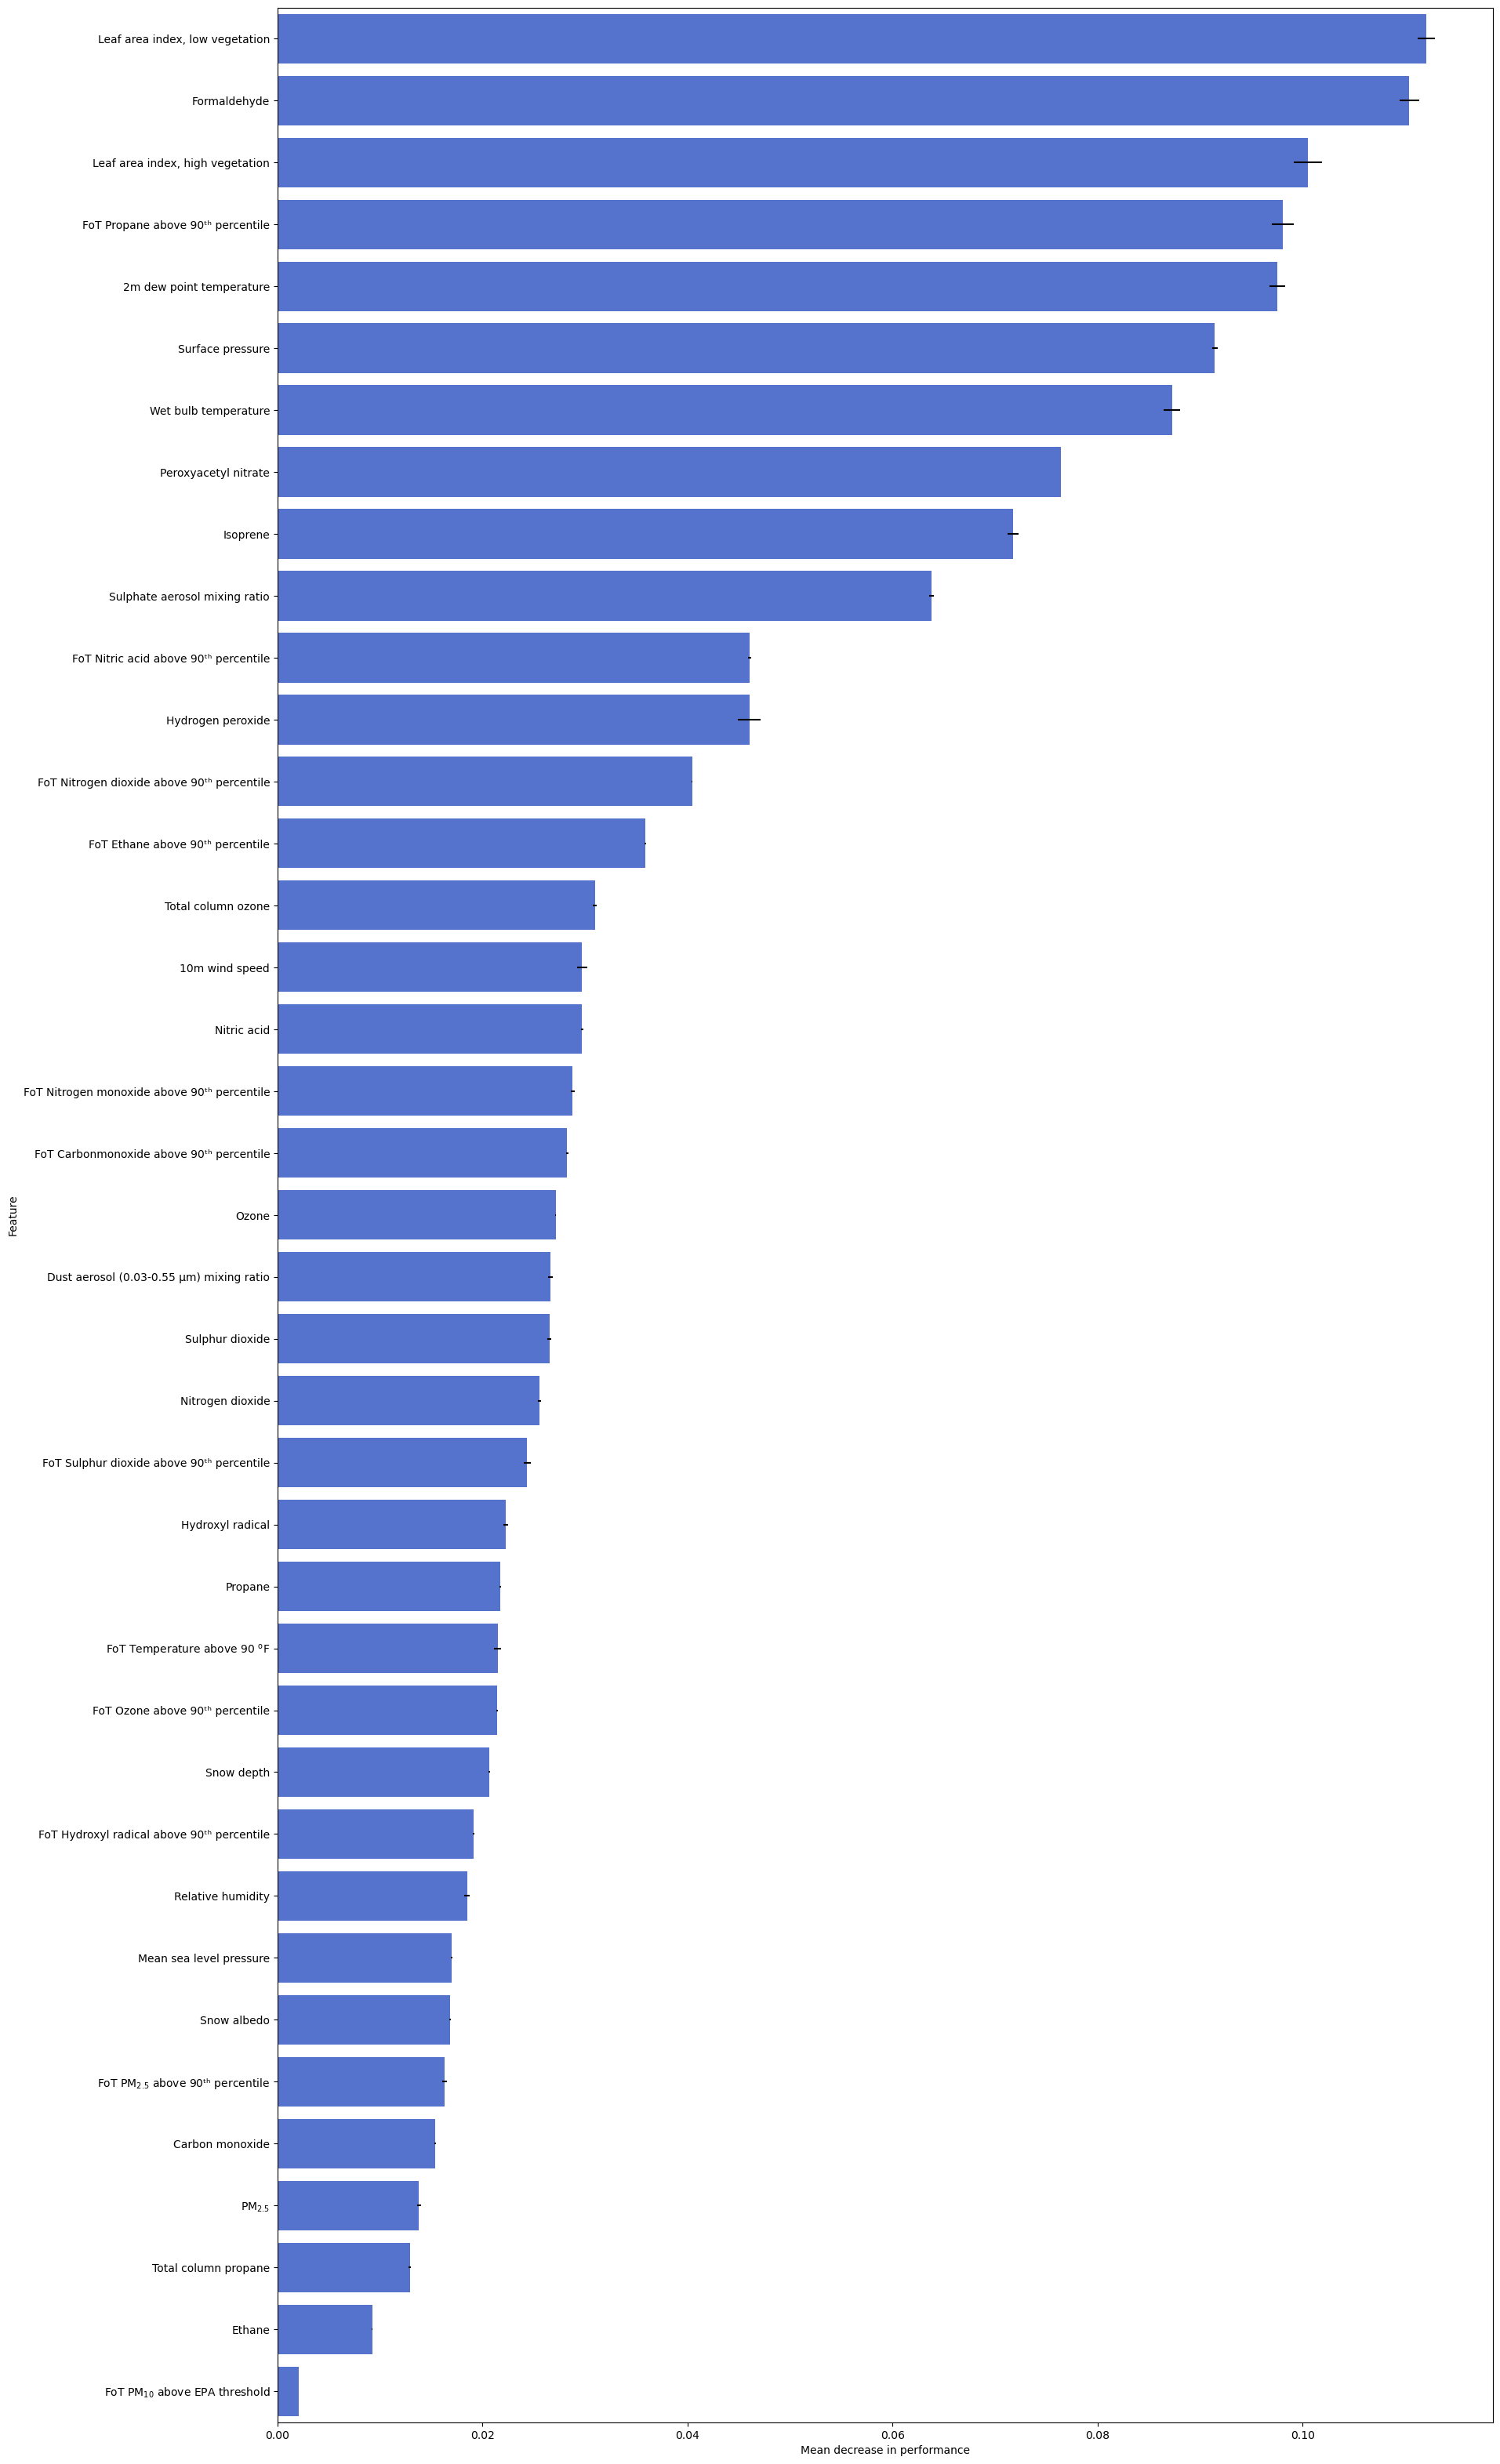

In [93]:
# Plot with custom error bars
fig, ax = plt.subplots(figsize=(20, 40))

sns.barplot(
    data=train_FI,
    x = "Mean Weight",
    y = "Feature",
    xerr = train_FI["Standard Deviation"],   # explicitly pass the std column
    capsize = 0.2,      # add caps to error bars
    color = "royalblue",
)


plt.xlabel("Mean decrease in performance")
plt.show()

In [94]:
train_FI_15 = train_FI.head(15)

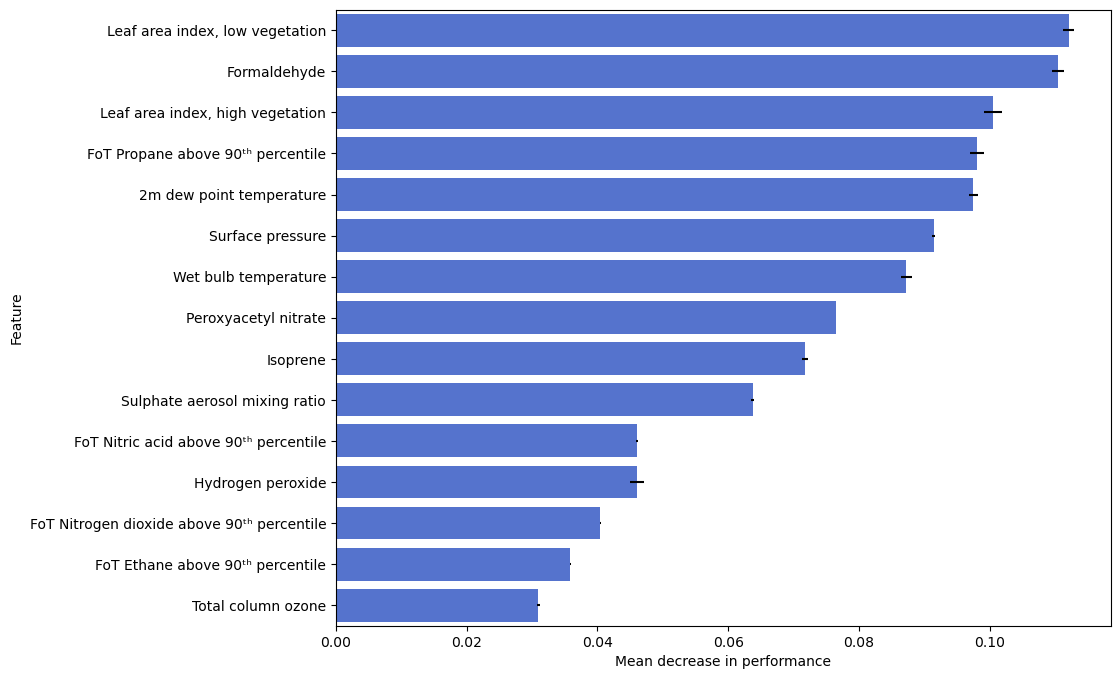

In [95]:
# Plot with custom error bars
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(
    data=train_FI_15,
    x = "Mean Weight",
    y = "Feature",
    xerr = train_FI_15["Standard Deviation"],   # explicitly pass the std column
    capsize = 0.2,      # add caps to error bars
    color = "royalblue",
)


plt.xlabel("Mean decrease in performance")
plt.show()

In [96]:
#shap_values = shap.TreeExplainer(final_model).shap_values(X_train)

In [97]:
#shap.summary_plot(shap_values, X_train,max_display = 39)

In [98]:
#shap.summary_plot(shap_values, X_train,max_display = 15)

In [99]:
## these changes were necessary as the xlabel went beyond the figure, so fontsize needs to be adjusted

#shap.summary_plot(shap_values, X_train, plot_type = "bar",max_display = 39, show=False)
#fig, ax = plt.gcf(), plt.gca()
#ax.set_xlabel('mean(|SHAP value|) (average impact on model output magnitude)', fontsize=5)

#plt.show()


In [100]:
## these changes were necessary as the xlabel went beyond the figure, so fontsize needs to be adjusted

#shap.summary_plot(shap_values, X_train, plot_type="bar",max_display = 15, show=False)
#fig, ax = plt.gcf(), plt.gca()
#ax.set_xlabel('mean(|SHAP value|) (average impact on model output magnitude)', fontsize=10)

#plt.show()
